--- Original Signal Generated ---
Generated 3000 data points over 3 cycles.
X-values range from 0.00 to 4.80
Y-values range from -0.82 to 5.62

--- Splitting Signal ---
Found 6 turning points (extrema).
Splitting into 7 monotonic segments.

--- Vector for Segment 1 ---
X values first: [0.         0.00160053] last:[0.42894298 0.43054351] 
Y values first: [0.         0.01417101] last:[2.41603855 2.41617417] 
Segment contains 271 points.

--- Vector for Segment 2 ---
X values first: [0.43214405 0.43374458] last:[1.16358786 1.1651884 ] 
Y values first: [2.41623134 2.41621013] last:[-0.81600077 -0.81615247] 
Segment contains 460 points.

--- Vector for Segment 3 ---
X values first: [1.16678893 1.16838946] last:[2.02947649 2.03107703] 
Y values first: [-0.8162259  -0.81622099] last:[4.01609248 4.01620194] 
Segment contains 542 points.

--- Vector for Segment 4 ---
X values first: [2.03267756 2.03427809] last:[2.76412137 2.76572191] 
Y values first: [4.01623297 4.01618565] last:[0.78393997 0.

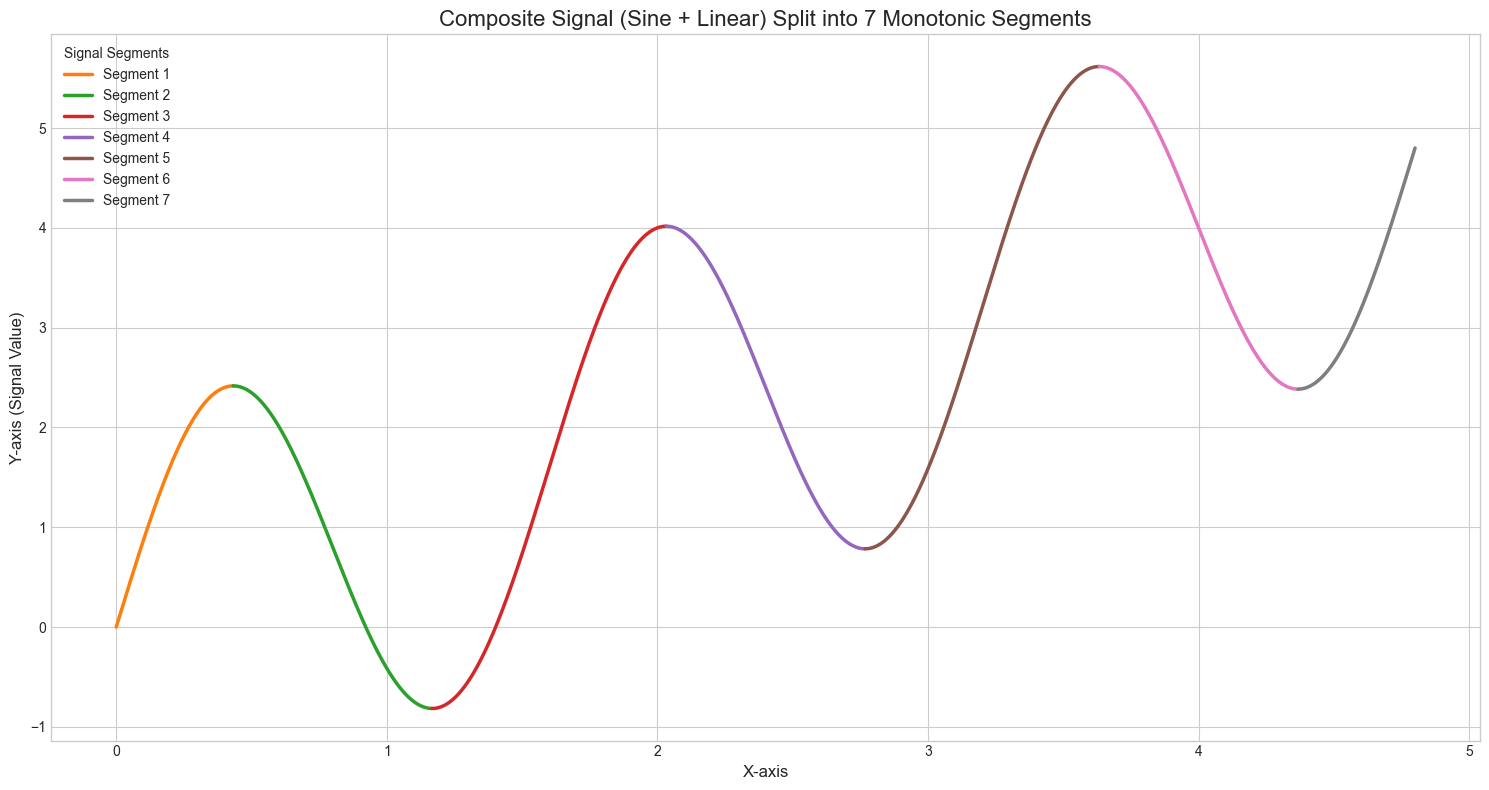

Value at peak of cycle 1 (t=0.40s): 2.4000
Value at trough of cycle 3 (t=4.40s): 2.4000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_and_process_signal():
    """
    Generates a composite signal, splits it into monotonic segments,
    and plots the results.
    """
    # --- 1. Signal Parameters ---
    # Define the characteristics of the sine wave and the linear signal.
    amplitude = 2.0       # Amplitude of the sine wave
    frequency = 0.625       # Frequency (not directly used for y vs x plot, but for context)
    wavelength = 1.6   # Wavelength (lambda) of the sine wave
    num_cycles = 3       # Number of sine wave cycles to generate
    slope_degrees = 45.0  # Slope of the linear signal in degrees

    # --- 2. Generate the Signal Data ---
    # The signal is the sum of a sine wave and a linear function.
    # y(x) = (Amplitude * sin(2*pi/wavelength * x)) + (slope * x)

    # Convert the slope from degrees to a gradient (m = tan(theta))
    slope_gradient = np.tan(np.deg2rad(slope_degrees))

    # Calculate the wave number 'k' for the sine wave
    # k = 2 * pi / wavelength
    k = 2 * np.pi / wavelength

    # Determine the total length of the x-axis
    x_max = num_cycles * wavelength

    # Create a dense array of x-values for a smooth curve.
    # We'll use 500 points per cycle for high resolution.
    num_points = int(num_cycles * 100000)
    x_values = np.linspace(0, x_max, num_points)

    # Calculate the corresponding y-values for the composite signal
    y_sine = amplitude * np.sin(k * x_values)
    y_linear = slope_gradient * x_values
    y_values = y_sine + y_linear

    print("--- Original Signal Generated ---")
    print(f"Generated {num_points} data points over {num_cycles} cycles.")
    print(f"X-values range from {x_values.min():.2f} to {x_values.max():.2f}")
    print(f"Y-values range from {y_values.min():.2f} to {y_values.max():.2f}\n")


    # --- 3. Split the Signal into Monotonic Segments ---
    # We split the array wherever the signal's direction changes (i.e., at local
    # minima and maxima). This happens where the y-values stop increasing and start
    # decreasing, or vice-versa.

    # Find the differences between consecutive y-values
    y_diff = np.diff(y_values)

    # Determine the sign of the difference (1 for increasing, -1 for decreasing)
    y_direction = np.sign(y_diff)

    # Find the indices where the direction changes. We add 1 to align the index
    # with the actual point of the extremum in the original y_values array.
    split_indices_raw = np.where(np.diff(y_direction) != 0)[0] + 1

    # Create a final list of split points, including the start and end of the signal
    split_indices = np.concatenate(([0], split_indices_raw, [len(x_values) - 1]))

    # Create lists to hold the split x and y arrays
    split_x_arrays = []
    split_y_arrays = []

    print(f"--- Splitting Signal ---")
    print(f"Found {len(split_indices_raw)} turning points (extrema).")
    print(f"Splitting into {len(split_indices)-1} monotonic segments.\n")

    for i in range(len(split_indices) - 1):
        start_index = split_indices[i]
        # We add 1 to the end_index to ensure the segments overlap at the split
        # point, making the final plot look continuous.
        end_index = split_indices[i+1] + 1

        # Slice the main arrays to create the new segment
        x_segment = x_values[start_index:end_index]
        y_segment = y_values[start_index:end_index]

        # Add the new segments to our lists
        split_x_arrays.append(x_segment)
        split_y_arrays.append(y_segment)

    # --- 4. Print the Split Vectors ---
    # Iterate through the generated segments and print them.
    for i, (x_seg, y_seg) in enumerate(zip(split_x_arrays, split_y_arrays)):
        print(f"--- Vector for Segment {i+1} ---")
        # To keep the output clean, we can show the first few values
        print(f"X values first: {x_seg[0:2]} last:{x_seg[-3:-1]} ")
        print(f"Y values first: {y_seg[0:2]} last:{y_seg[-3:-1]} ")
        print(f"Segment contains {len(x_seg)} points.\n")


    # --- 5. Plot the Results ---
    # Create a plot and draw each segment with a different color.
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(x_values,y_values)

    for i in range(len(split_x_arrays)):
        ax.plot(split_x_arrays[i], split_y_arrays[i],
                label=f'Segment {i+1}', linewidth=2.5)

    # Add labels, title, and a legend for clarity
    ax.set_title(f'Composite Signal (Sine + Linear) Split into {len(split_x_arrays)} Monotonic Segments', fontsize=16)
    ax.set_xlabel('X-axis', fontsize=12)
    ax.set_ylabel('Y-axis (Signal Value)', fontsize=12)
    ax.legend(title='Signal Segments')
    fig.tight_layout()

    # Display the plot
    plt.show()

    K = 3
    # Now, `y_composite` holds the correct signal data you want to analyze.
    # You can proceed to find the values at specific points or plot it.
    # For example, to check our work:
    t_peak1 = wavelength / 4
    val_peak1 = amplitude * np.sin(k * t_peak1) + slope_gradient * t_peak1
    print(f"Value at peak of cycle 1 (t={t_peak1:.2f}s): {val_peak1:.4f}") # Should be 2.4

    t_trough3 = (K - 1) * wavelength + (3 * wavelength / 4)
    val_trough3 = amplitude * np.sin(k * t_trough3) + slope_gradient * t_trough3
    print(f"Value at trough of cycle 3 (t={t_trough3:.2f}s): {val_trough3:.4f}") # Should be 2.4


if __name__ == '__main__':
    generate_and_process_signal()


Calculated Slope 'm': 1.0000
Required Frequency 'f' for K=3: 0.6250 Hz
Required Period 'T': 1.6000 seconds
Value at peak of cycle 1 (t=0.40s): 2.4000
Value at trough of cycle 3 (t=4.40s): 2.4000

Data successfully saved to 'composite_signal_data.csv'


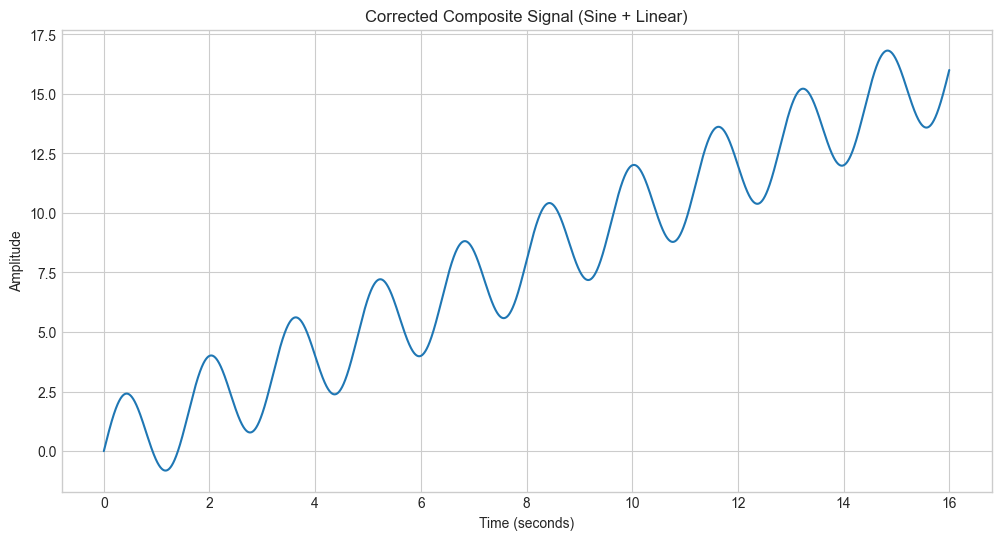

In [7]:
import numpy as np
import csv
# Assuming you will use matplotlib to plot, though it's not in the original snippet.
# import matplotlib.pyplot as plt

def generate_and_plot_signal():
    """
    Generates a composite signal (sine + linear) based on our discussion
    and prepares it for analysis or plotting.
    """
    # --- 1. Signal Parameters (Matching our discussion) ---
    # These parameters are based on our conversation to make the peak of cycle 1
    # match the trough of cycle 3.

    amplitude = 2.0       # Corresponds to 'A' in our formulas
    slope_degrees = 45.0  # The angle of the linear ramp
    num_cycles = 10       # Number of sine wave cycles to generate

    # --- 2. Calculate Derived Parameters (The "Fix") ---
    # Here, we use the formulas we derived to get the exact parameters
    # that will make the condition (Peak of C1 == Trough of C3) true.

    # Convert slope from degrees to a gradient 'm'
    # m = tan(theta). For 45 degrees, this is exactly 1.
    slope_m = np.tan(np.deg2rad(slope_degrees))

    # We are targeting the 3rd cycle, so K=3
    K = 3

    # Calculate the exact FREQUENCY 'f' needed using our formula:
    # f_K = (m / 2A) * (K - 0.5)
    frequency_f = (slope_m / (2 * amplitude)) * (K - 0.5)
    # This will calculate f = (1 / 4) * 2.5 = 0.625 Hz

    # Calculate the exact PERIOD 'T' from the frequency. This is the crucial
    # value that was being misinterpreted as "wavelength".
    # T = 1 / f
    period_T = 1 / frequency_f
    # This will calculate T = 1 / 0.625 = 1.6 seconds

    print(f"Calculated Slope 'm': {slope_m:.4f}")
    print(f"Required Frequency 'f' for K=3: {frequency_f:.4f} Hz")
    print(f"Required Period 'T': {period_T:.4f} seconds")

    # --- 3. Generate the Signal Data (in the TIME domain) ---
    # The signal is a function of TIME 't'.
    # C(t) = A * sin(2*pi/T * t) + m*t

    # Angular frequency 'omega' (ω) = 2 * pi / T
    omega = 2 * np.pi / period_T

    # Determine the total time for the x-axis
    t_max = num_cycles * period_T

    # Create a dense array of time-values for a smooth curve.
    num_points = int(num_cycles * 1000)
    t_values = np.linspace(0, t_max, num_points)

    # --- THIS IS THE CRITICAL FIX ---
    # Calculate the two separate components of the signal
    y_sine = amplitude * np.sin(omega * t_values)
    y_linear = slope_m * t_values

    # Add them together to create the final composite signal
    y_composite = y_sine + y_linear

    # Now, `y_composite` holds the correct signal data you want to analyze.
    # You can proceed to find the values at specific points or plot it.
    # For example, to check our work:
    t_peak1 = period_T / 4
    val_peak1 = amplitude * np.sin(omega * t_peak1) + slope_m * t_peak1
    print(f"Value at peak of cycle 1 (t={t_peak1:.2f}s): {val_peak1:.4f}") # Should be 2.4

    t_trough3 = (K - 1) * period_T + (3 * period_T / 4)
    val_trough3 = amplitude * np.sin(omega * t_trough3) + slope_m * t_trough3
    print(f"Value at trough of cycle 3 (t={t_trough3:.2f}s): {val_trough3:.4f}") # Should be 2.4

        # --- 4. Save the Data to CSV ---
    # Define the name of the output file
    filename = "composite_signal_data.csv"

    try:
        # Open the file in 'write' mode. `newline=''` is a best practice.
        with open(filename, 'w', newline='') as csvfile:
            # Create a csv writer object
            csv_writer = csv.writer(csvfile)

            # Write the header row
            csv_writer.writerow(['Time (s)', 'Amplitude'])

            # Use zip to pair each time value with its amplitude value
            # and write all rows to the file
            csv_writer.writerows(zip(t_values, y_composite))

        print(f"\nData successfully saved to '{filename}'")

    except IOError as e:
        print(f"\nError saving file: {e}")


    return t_values, y_composite

# --- Run the function ---
if __name__ == '__main__':
    t, y = generate_and_plot_signal()
    # You can add plotting code here, e.g.:
    plt.figure(figsize=(12, 6))
    plt.plot(t, y)
    plt.title("Corrected Composite Signal (Sine + Linear)")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

--- Wave Properties ---
Calculated Wavelength: 1.6132
Wave Number (k): 3.8949
Slope (m): 1.0000

--- Splitting Signal by Derivative ---
cos(kx) solved for: -0.1284
Calculated 12 split points (extrema).
Splitting into 13 segments.

--- Vector for Segment 1 ---
Segment contains 27050 points. X starts at 0.00, Y starts at 0.00
X values first: [0.00000000e+00 1.61320514e-05] last:[0.43632359 0.43633973] 
Y values first: [0.        0.0001418] last:[2.41980338 2.41980339] 
--- Vector for Segment 2 ---
Segment contains 45904 points. X starts at 0.44, Y starts at 2.42
X values first: [0.43635586 0.43637199] last:[1.17683315 1.17684928] 
Y values first: [2.41980339 2.41980338] last:[-0.80660093 -0.80660094] 
--- Vector for Segment 3 ---
Segment contains 54098 points. X starts at 1.18, Y starts at -0.81
X values first: [1.17686541 1.17688154] last:[2.04952873 2.04954486] 
Y values first: [-0.80660094 -0.80660093] last:[4.03300583 4.03300584] 
--- Vector for Segment 4 ---
Segment contains 45903 p

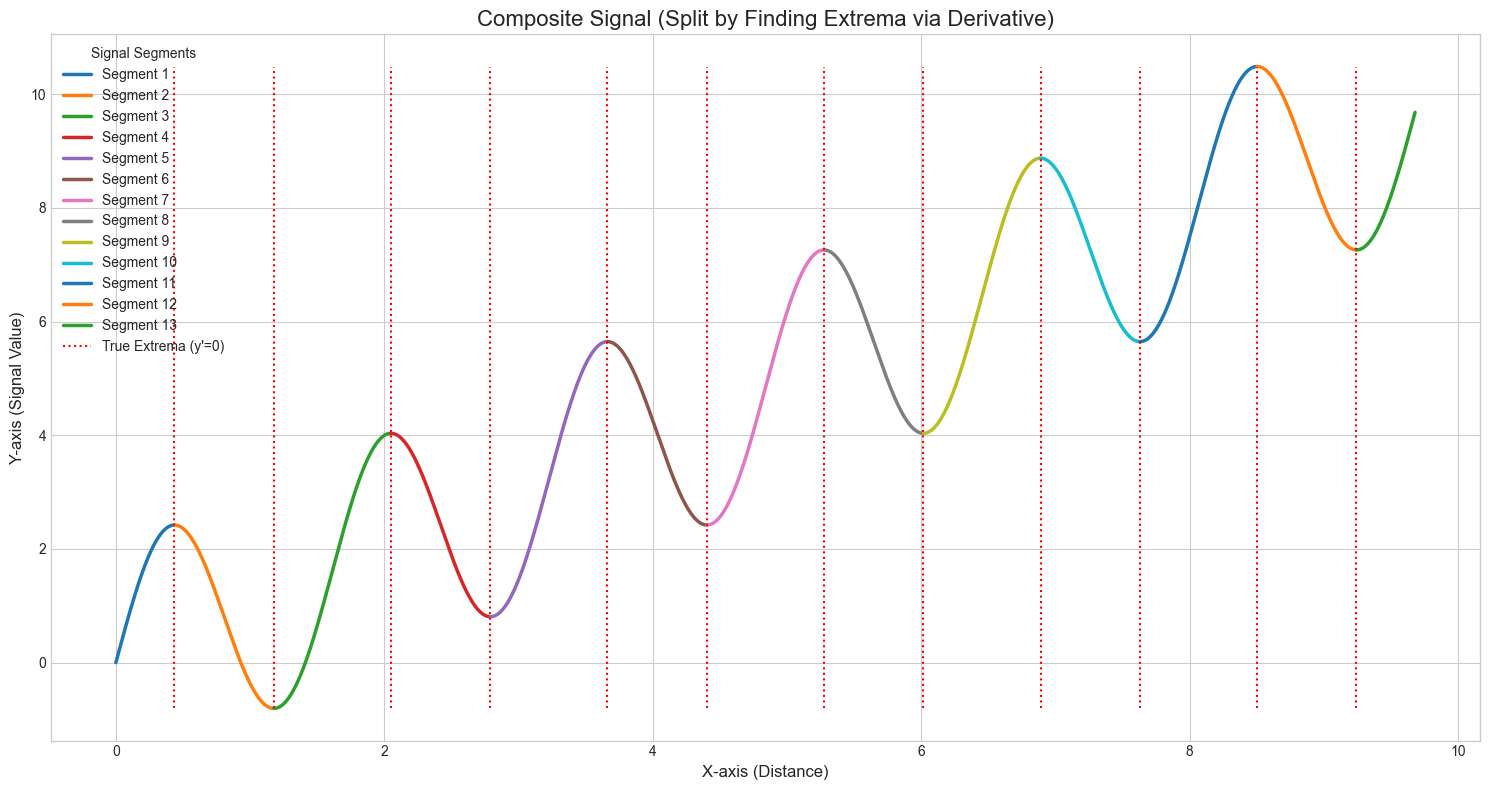

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_and_process_signal_by_derivative():
    """
    Generates a composite signal and splits it at its true turning points,
    which are found by setting the function's derivative to zero.
    """
    # --- 1. Signal Parameters ---
    amplitude = 2.0
    frequency = 0.619885
    wave_speed = 1.0
    num_cycles = 6
    slope_degrees =45.0

    # --- 2. Calculate Spatial & Signal Properties ---
    if frequency <= 0:
        raise ValueError("Frequency must be a positive number.")
    wavelength = wave_speed / frequency
    k = 2 * np.pi / wavelength  # Wave number
    slope_gradient = np.tan(np.deg2rad(slope_degrees)) # Slope 'm'

    print(f"--- Wave Properties ---")
    print(f"Calculated Wavelength: {wavelength:.4f}")
    print(f"Wave Number (k): {k:.4f}")
    print(f"Slope (m): {slope_gradient:.4f}\n")

    # --- 3. Generate the Signal Data ---
    x_max = num_cycles * wavelength
    num_points = int(num_cycles * 100000)
    x_values = np.linspace(0, x_max, num_points)
    y_sine = amplitude * np.sin(k * x_values)
    y_linear = slope_gradient * x_values
    y_values = y_sine + y_linear

    # --- 4. Split Signal using Calculus (Derivative Method) ---
    # The turning points (extrema) occur where the derivative of the function is 0.
    # Function: y(x) = A*sin(kx) + mx
    # Derivative: y'(x) = A*k*cos(kx) + m
    # Set derivative to 0: A*k*cos(kx) + m = 0  =>  cos(kx) = -m / (A*k)

    cos_val = -slope_gradient / (amplitude * k)

    # The arccos function is only defined for inputs between -1 and 1.
    if abs(cos_val) > 1:
        print("No turning points exist. The linear slope is too steep.")
        # If no turning points, we can treat the whole signal as one segment
        split_x_arrays = [x_values]
        split_y_arrays = [y_values]
        split_x_locations = []
    else:
        # Find the principal angle (in radians) for the phase.
        # This gives us the first solution for kx.
        principal_angle = np.arccos(cos_val)

        split_x_locations = []
        n = 0
        while True:
            # The general solution for arccos gives two sets of angles per 2*pi cycle.
            # Solution 1: kx = 2*n*pi + principal_angle
            x_loc1 = (2 * n * np.pi + principal_angle) / k
            # Solution 2: kx = 2*(n+1)*pi - principal_angle
            x_loc2 = (2 * (n + 1) * np.pi - principal_angle) / k

            # Add the locations if they are within our x-range
            stop_adding = True
            if x_loc1 < x_max:
                split_x_locations.append(x_loc1)
                stop_adding = False
            if x_loc2 < x_max:
                split_x_locations.append(x_loc2)
                stop_adding = False
            
            if stop_adding:
                break
            n += 1
        
        # Sort the locations as they are generated out of order
        split_x_locations.sort()
        
        # Find the indices in our x_values array that are closest to these exact locations
        split_indices_raw = np.searchsorted(x_values, split_x_locations)
        split_indices = np.concatenate(([0], split_indices_raw, [len(x_values) - 1]))

        split_x_arrays = []
        split_y_arrays = []

        for i in range(len(split_indices) - 1):
            start_index = split_indices[i]
            end_index = split_indices[i+1] + 1
            if i == len(split_indices) - 2:
                end_index = split_indices[i+1]
            x_segment = x_values[start_index:end_index]
            y_segment = y_values[start_index:end_index]
            split_x_arrays.append(x_segment)
            split_y_arrays.append(y_segment)

    print(f"--- Splitting Signal by Derivative ---")
    print(f"cos(kx) solved for: {cos_val:.4f}")
    print(f"Calculated {len(split_x_locations)} split points (extrema).")
    print(f"Splitting into {len(split_x_arrays)} segments.\n")

    # --- 5. Print the Split Vectors ---
    for i, (x_seg, y_seg) in enumerate(zip(split_x_arrays, split_y_arrays)):
        print(f"--- Vector for Segment {i+1} ---")
        print(f"Segment contains {len(x_seg)} points. X starts at {x_seg[0]:.2f}, Y starts at {y_seg[0]:.2f}")
        print(f"X values first: {x_seg[0:2]} last:{x_seg[-3:-1]} ")
        print(f"Y values first: {y_seg[0:2]} last:{y_seg[-3:-1]} ")

    # --- 6. Plot the Results ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(15, 8))

    for i in range(len(split_x_arrays)):
        ax.plot(split_x_arrays[i], split_y_arrays[i],
                label=f'Segment {i+1}', linewidth=2.5)

    ax.vlines(split_x_locations, ymin=y_values.min(), ymax=y_values.max(),
              colors='red', linestyles=':', label='True Extrema (y\'=0)')

    ax.set_title(f'Composite Signal (Split by Finding Extrema via Derivative)', fontsize=16)
    ax.set_xlabel('X-axis (Distance)', fontsize=12)
    ax.set_ylabel('Y-axis (Signal Value)', fontsize=12)
    ax.legend(title='Signal Segments')
    fig.tight_layout()

    plt.show()

if __name__ == '__main__':
    generate_and_process_signal_by_derivative()


In [45]:
import numpy as np
from scipy.optimize import fsolve # The numerical solver

def find_true_matching_frequency():
    """
    Finds the frequency 'f' where the value at the true peak of the first
    cycle equals the value at the true trough of a subsequent cycle 'N'.
    """
    # --- 1. Define Known Parameters ---
    A = 2 # Amplitude
    m = 1.0  # Slope
    N = 3 # Target subsequent cycle

    # --- 2. Define the Error Function to Solve ---
    # We need to find the root of this function, i.e., where error_function(omega) = 0.
    # This is a direct implementation of the transcendental equation derived above.
    def error_function(omega, A_param, m_param, N_param):
        # The equation is only valid if A*omega > m, otherwise we get a math error.
        if m_param >= A_param * omega:
            return 1e9 # Return a large number if parameters are invalid

        # Calculate the common terms
        sqrt_term = np.sqrt(1 - (m_param**2 / (A_param**2 * omega**2)))
        arccos_term = np.arccos(-m_param / (A_param * omega))

        # Left-hand side of the equation
        LHS = 2 * A_param * sqrt_term

        # Right-hand side of the equation
        RHS = (m_param / omega) * (2 * np.pi * N_param - 2 * arccos_term)

        return LHS - RHS

    # --- 3. Find the Solution Numerically ---
    # We need an initial guess for the solver. Let's use the frequency from
    # our previous, simpler model as a starting point.
    f_simple_guess = (m / (2 * A)) * (N - 0.5)
    omega_guess = 2 * np.pi * f_simple_guess

    # Use fsolve to find the omega that makes our error_function zero.
    # The `args` parameter passes the constants to our function.
    omega_solution, = fsolve(error_function, omega_guess, args=(A, m, N))

    # Convert the angular frequency solution back to Hz
    f_solution = omega_solution / (2 * np.pi)

    # --- 4. Print the Results ---
    print("--- Solving for True Turning Point Match ---")
    print(f"Parameters: A={A}, m={m}, Target Cycle N={N}")
    print(f"Initial Guess (from simple model): f = {f_simple_guess:.6f} Hz")
    print("-" * 40)
    print(f"Numerical Solution for Angular Frequency (ω): {omega_solution:.6f} rad/s")
    print(f"Precise Frequency Solution (f): {f_solution:.6f} Hz")

    return f_solution

# --- Run the Solver ---
if __name__ == '__main__':
    precise_frequency = find_true_matching_frequency()

--- Solving for True Turning Point Match ---
Parameters: A=2, m=1.0, Target Cycle N=3
Initial Guess (from simple model): f = 0.625000 Hz
----------------------------------------
Numerical Solution for Angular Frequency (ω): 3.894853 rad/s
Precise Frequency Solution (f): 0.619885 Hz


In [5]:
import numpy as np

def find_N_for_frequency():
    """
    For a given frequency 'f', calculates the effective cycle number 'N'
    where the value at the true peak of the first cycle equals the value
    at the true trough of cycle 'N'.
    """
    # --- 1. Define Known Parameters ---
    A = 1.226  # Amplitude
    m = 1.0  # Slope
    f = 1.235590e+3  # Input Frequency in Hz (using the result from our last script as an example)

    # --- 2. Calculate N using the derived formula ---
    # Convert frequency in Hz to angular frequency in rad/s
    omega = 2 * np.pi * f

    # Validity Check: The slope 'm' cannot be greater than the sine wave's
    # maximum slope 'A*omega', otherwise no turning points exist.
    if m >= A * omega:
        print(f"\nError: Invalid Parameters. The slope 'm' ({m}) is too high for the given")
        print(f"amplitude and frequency. 'm' must be less than 'A*omega' ({A*omega:.4f}).")
        return None

    # Calculate the two main parts of the formula
    term1 = (A * omega) / (np.pi * m) * np.sqrt(1 - (m**2 / (A**2 * omega**2)))
    term2 = (1 / np.pi) * np.arccos(-m / (A * omega))

    # The final result for N
    N_solution = term1 + term2

    # --- 3. Print the Results ---
    print("--- Solving for N for a Given Frequency ---")
    print(f"Parameters: A={A}, m={m}, Input Frequency f={f:.24f} Hz")
    print("-" * 40)
    print(f"Effective Cycle Number (N): {N_solution:.24f}")
    print("\nNote: 'N' is not expected to be an integer. It represents the point")
    print("in the signal's evolution where the condition is met.")

    return N_solution

# --- Run the Calculator ---
if __name__ == '__main__':
    N_result = find_N_for_frequency()

--- Solving for N for a Given Frequency ---
Parameters: A=1.226, m=1.0, Input Frequency f=1235.589999999999918145476840 Hz
----------------------------------------
Effective Cycle Number (N): 3030.166696721506923495326191

Note: 'N' is not expected to be an integer. It represents the point
in the signal's evolution where the condition is met.


In [6]:
import numpy as np
from scipy.optimize import fsolve

def find_amplitude_for_N():
    """
    Finds the Amplitude 'A' required for the value at the true peak of the
    first cycle to equal the value at the true trough of a given cycle 'N',
    for a known frequency and slope.
    """
    # --- 1. Define Known Parameters ---
    m = 1.0          # Slope
    f = 1.235590e+3     # Known Frequency in Hz
    N = 3030            # Target integer cycle

    # --- 2. Define the Error Function to Solve for 'A' ---
    # We need to find the value of 'A' that makes this function return 0.
    # The unknown variable here is 'A_param'.
    def error_function(A_param, m_param, omega_param, N_param):
        # The equation is only valid if A*omega > m. This check is crucial.
        if m_param >= A_param * omega_param:
            return 1e9 # Return a large number if parameters are invalid

        # Calculate the common terms based on the current 'A_param' guess
        sqrt_term = np.sqrt(1 - (m_param**2 / (A_param**2 * omega_param**2)))
        arccos_term = np.arccos(-m_param / (A_param * omega_param))

        # Left-hand side of the master equation
        LHS = 2 * A_param * sqrt_term

        # Right-hand side of the master equation
        RHS = (m_param / omega_param) * (2 * np.pi * N_param - 2 * arccos_term)

        return LHS - RHS

    # --- 3. Find the Solution Numerically ---
    # Convert known frequency 'f' to angular frequency 'omega'
    omega = 2 * np.pi * f

    # For the solver to work, we need a reasonable initial guess for 'A'.
    # We can calculate one from our older, simpler formula: N = 2A/(mT) + 0.5
    # Solved for A: A = m*T*(N-0.5)/2 = m*(N-0.5)/(2*f)
    A_guess = (m * (N - 0.5)) / (2 * f)

    # Use fsolve to find the 'A' that makes our error_function zero.
    # The first argument to fsolve is the initial guess for the variable we are solving for.
    try:
        A_solution, = fsolve(error_function, A_guess, args=(m, omega, N))
    except Exception as e:
        print(f"An error occurred during solving: {e}")
        print("This may be because no physical solution exists for the given parameters.")
        return None


    # --- 4. Print the Results ---
    print("--- Solving for Amplitude for a Given N and Frequency ---")
    print(f"Parameters: m={m}, f={f:.6f} Hz, Target Cycle N={N}")
    print(f"Initial Guess for Amplitude (from simple model): A = {A_guess:.24f}")
    print("-" * 60)
    print(f"Precise Amplitude Solution (A): {A_solution:.24f}")

    return A_solution

# --- Run the Solver ---
if __name__ == '__main__':
    precise_amplitude = find_amplitude_for_N()

--- Solving for Amplitude for a Given N and Frequency ---
Parameters: m=1.0, f=1235.590000 Hz, Target Cycle N=3030
Initial Guess for Amplitude (from simple model): A = 1.225932550441489521375615
------------------------------------------------------------
Precise Amplitude Solution (A): 1.225932543674509211939494


--- Wave Properties ---
Calculated Wavelength: 1.6132
Wave Number (k): 3.8949
Slope (m): 1.0000

--- Splitting Signal by Derivative ---
cos(kx) solved for: -0.1284
Calculated 6 split points (extrema).
Splitting into 7 segments.

--- Original Vector for Segment 1 ---
Segment contains 137 points. X starts at 0.00, Y starts at 0.00
--- Original Vector for Segment 2 ---
Segment contains 230 points. X starts at 0.44, Y starts at 2.42
--- Original Vector for Segment 3 ---
Segment contains 271 points. X starts at 1.18, Y starts at -0.81
--- Original Vector for Segment 4 ---
Segment contains 231 points. X starts at 2.05, Y starts at 4.03
--- Original Vector for Segment 5 ---
Segment contains 271 points. X starts at 2.79, Y starts at 0.81
--- Original Vector for Segment 6 ---
Segment contains 230 points. X starts at 3.66, Y starts at 5.65
--- Original Vector for Segment 7 ---
Segment contains 135 points. X starts at 4.40, Y starts at 2.42


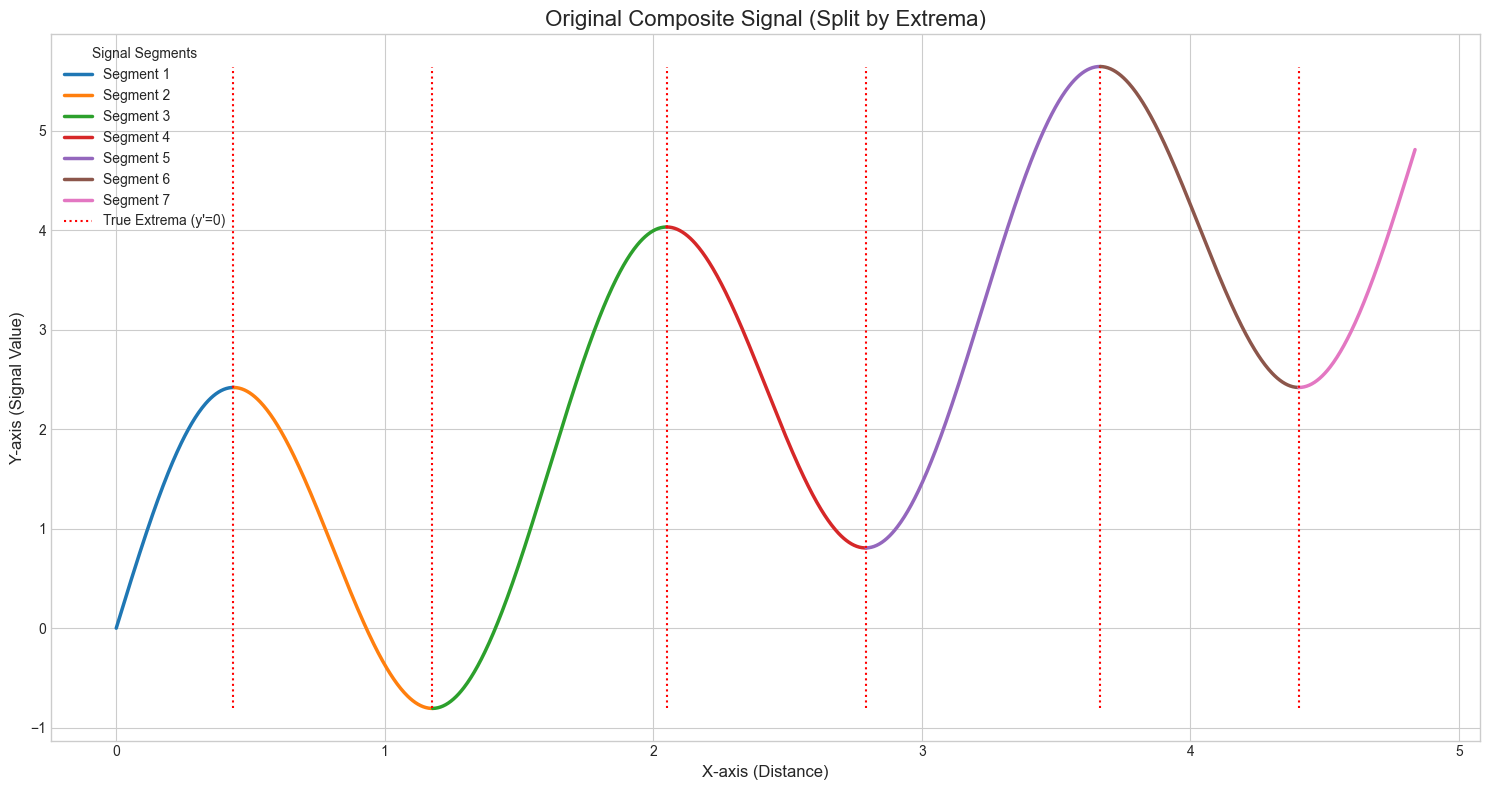


--- Performing Cyclical Re-arrangement ---
Segments have been rearranged into 2 groups.

--- Group 1 ---
  Contains original segment 1
  Contains original segment 3
  Contains original segment 5
  Contains original segment 7
--- Group 2 ---
  Contains original segment 2
  Contains original segment 4
  Contains original segment 6


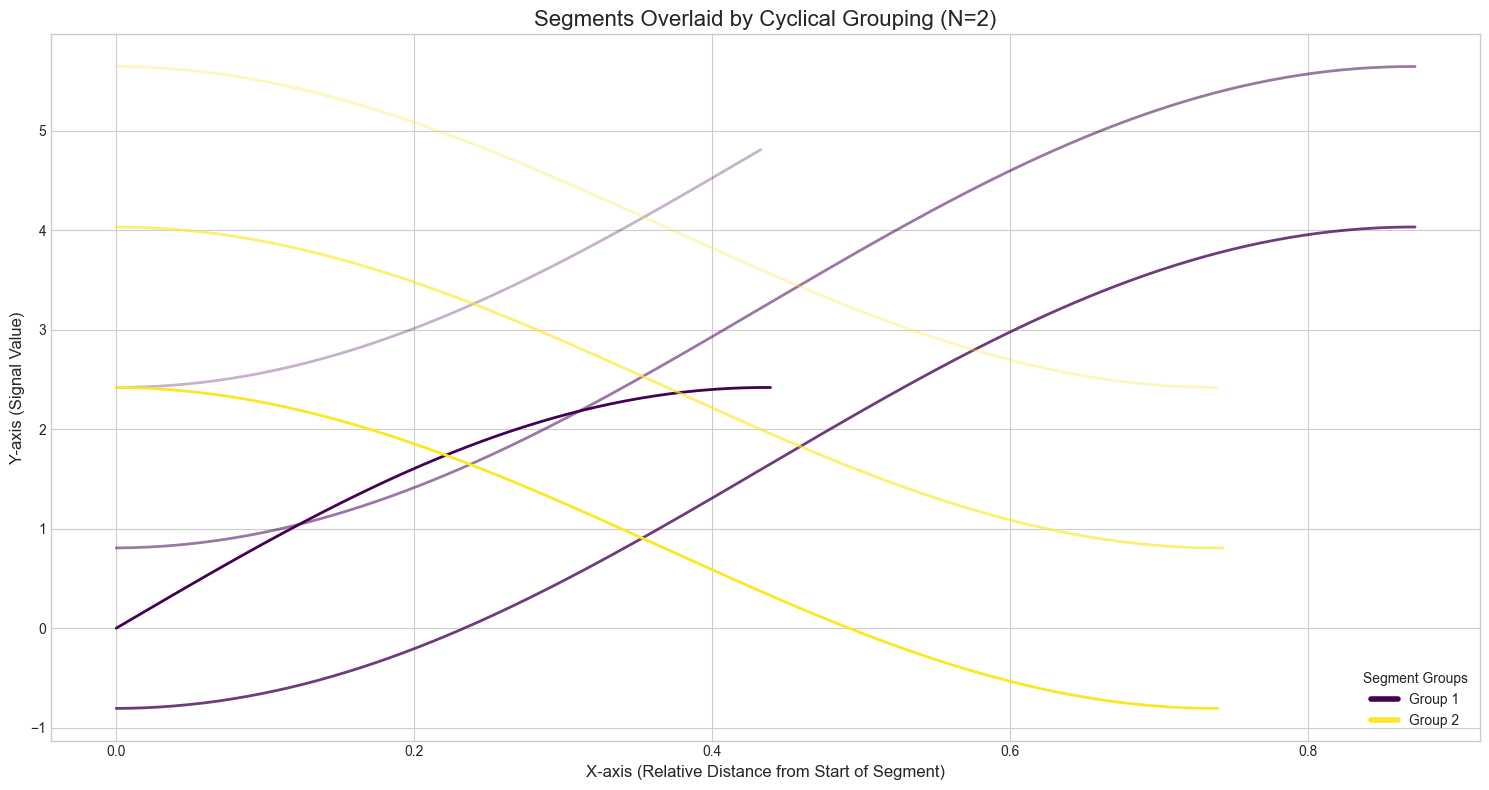

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def generate_and_process_signal():
    """
    Generates a composite signal, splits it at its true turning points,
    plots the original result, and then creates a second plot with the
    segments rearranged cyclically.
    """
    # --- 1. Signal Parameters ---
    amplitude = 2.0
    frequency = 0.619885
    wave_speed = 1.0
    num_cycles = 3
    slope_degrees = 45.0

    # --- 2. Calculate Spatial & Signal Properties ---
    if frequency <= 0:
        raise ValueError("Frequency must be a positive number.")
    wavelength = wave_speed / frequency
    k = 2 * np.pi / wavelength  # Wave number
    slope_gradient = np.tan(np.deg2rad(slope_degrees)) # Slope 'm'

    print(f"--- Wave Properties ---")
    print(f"Calculated Wavelength: {wavelength:.4f}")
    print(f"Wave Number (k): {k:.4f}")
    print(f"Slope (m): {slope_gradient:.4f}\n")

    # --- 3. Generate the Signal Data ---
    x_max = num_cycles * wavelength
    num_points = int(num_cycles * 500)
    x_values = np.linspace(0, x_max, num_points)
    y_sine = amplitude * np.sin(k * x_values)
    y_linear = slope_gradient * x_values
    y_values = y_sine + y_linear

    # --- 4. Split Signal using Calculus (Derivative Method) ---
    cos_val = -slope_gradient / (amplitude * k)

    split_x_arrays = []
    split_y_arrays = []
    split_x_locations = []

    if abs(cos_val) > 1:
        print("No turning points exist. The linear slope is too steep.")
        split_x_arrays = [x_values]
        split_y_arrays = [y_values]
    else:
        principal_angle = np.arccos(cos_val)
        n = 0
        while True:
            x_loc1 = (2 * n * np.pi + principal_angle) / k
            x_loc2 = (2 * (n + 1) * np.pi - principal_angle) / k
            stop_adding = True
            if x_loc1 < x_max:
                split_x_locations.append(x_loc1)
                stop_adding = False
            if x_loc2 < x_max:
                split_x_locations.append(x_loc2)
                stop_adding = False
            if stop_adding: break
            n += 1
        
        split_x_locations.sort()
        split_indices_raw = np.searchsorted(x_values, split_x_locations)
        split_indices = np.concatenate(([0], split_indices_raw, [len(x_values) - 1]))

        for i in range(len(split_indices) - 1):
            start_index = split_indices[i]
            end_index = split_indices[i+1] + 1
            if i == len(split_indices) - 2: end_index = split_indices[i+1]
            split_x_arrays.append(x_values[start_index:end_index])
            split_y_arrays.append(y_values[start_index:end_index])

    print(f"--- Splitting Signal by Derivative ---")
    print(f"cos(kx) solved for: {cos_val:.4f}")
    print(f"Calculated {len(split_x_locations)} split points (extrema).")
    print(f"Splitting into {len(split_x_arrays)} segments.\n")

    # --- 5. Print the Original Split Vectors ---
    for i, (x_seg, y_seg) in enumerate(zip(split_x_arrays, split_y_arrays)):
        print(f"--- Original Vector for Segment {i+1} ---")
        print(f"Segment contains {len(x_seg)} points. X starts at {x_seg[0]:.2f}, Y starts at {y_seg[0]:.2f}")

    # --- 6. Plot the Original Results ---
    fig1, ax1 = plt.subplots(figsize=(15, 8))
    for i in range(len(split_x_arrays)):
        ax1.plot(split_x_arrays[i], split_y_arrays[i],
                 label=f'Segment {i+1}', linewidth=2.5)
    ax1.vlines(split_x_locations, ymin=y_values.min(), ymax=y_values.max(),
               colors='red', linestyles=':', label='True Extrema (y\'=0)')
    ax1.set_title(f'Original Composite Signal (Split by Extrema)', fontsize=16)
    ax1.set_xlabel('X-axis (Distance)', fontsize=12)
    ax1.set_ylabel('Y-axis (Signal Value)', fontsize=12)
    ax1.legend(title='Signal Segments')
    fig1.tight_layout()
    plt.show()

    # --- 7. NEW: Cyclical Re-arrangement and Plotting ---
    print("\n--- Performing Cyclical Re-arrangement ---")
    N_cycles_rearrange = 2  # The number of groups to cycle through.
                           # Since a full wave cycle has 2 segments (up/down), N=2 is natural.

    # Create a list of lists to hold the grouped segments.
    # Each item will be a list of (x_array, y_array) tuples.
    rearranged_groups = [[] for _ in range(N_cycles_rearrange)]

    for i, (x_seg, y_seg) in enumerate(zip(split_x_arrays, split_y_arrays)):
        # Determine which group this segment belongs to
        group_index = i % N_cycles_rearrange
        
        # Reset the x-axis for this segment to start at 0
        x_reset = x_seg - x_seg[0]
        
        # Add the (reset_x, y) pair to the correct group
        rearranged_groups[group_index].append((x_reset, y_seg))

    print(f"Segments have been rearranged into {N_cycles_rearrange} groups.\n")

    # --- 8. NEW: Plot the Rearranged Data ---
    fig2, ax2 = plt.subplots(figsize=(15, 8))
    
    # Use a color map to give each group a distinct color
    colors = plt.cm.viridis(np.linspace(0, 1, N_cycles_rearrange))

    for i, group in enumerate(rearranged_groups):
        print(f"--- Group {i+1} ---")
        # Use varying alpha (transparency) to see overlapping segments
        alpha_values = np.linspace(1.0, 0.3, len(group))
        for j, (x_reset, y_seg) in enumerate(group):
            print(f"  Contains original segment {i + j*N_cycles_rearrange + 1}")
            ax2.plot(x_reset, y_seg, 
                     color=colors[i], 
                     alpha=alpha_values[j], 
                     linewidth=2, 
                     label=f'Group {i+1}, Cycle {j+1}')

    ax2.set_title(f'Segments Overlaid by Cyclical Grouping (N={N_cycles_rearrange})', fontsize=16)
    ax2.set_xlabel('X-axis (Relative Distance from Start of Segment)', fontsize=12)
    ax2.set_ylabel('Y-axis (Signal Value)', fontsize=12)
    # A full legend can be crowded, so we create a custom one for groups.
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=colors[i], lw=4) for i in range(N_cycles_rearrange)]
    ax2.legend(custom_lines, [f'Group {i+1}' for i in range(N_cycles_rearrange)], title="Segment Groups")
    fig2.tight_layout()
    plt.show()


if __name__ == '__main__':
    generate_and_process_signal()


--- Wave Properties ---
Calculated Wavelength: 1.6132
Wave Number (k): 3.8949
Slope (m): 1.0000

--- Splitting Signal by Derivative ---
cos(kx) solved for: -0.1284
Calculated 6 split points (extrema).
Splitting into 7 segments.



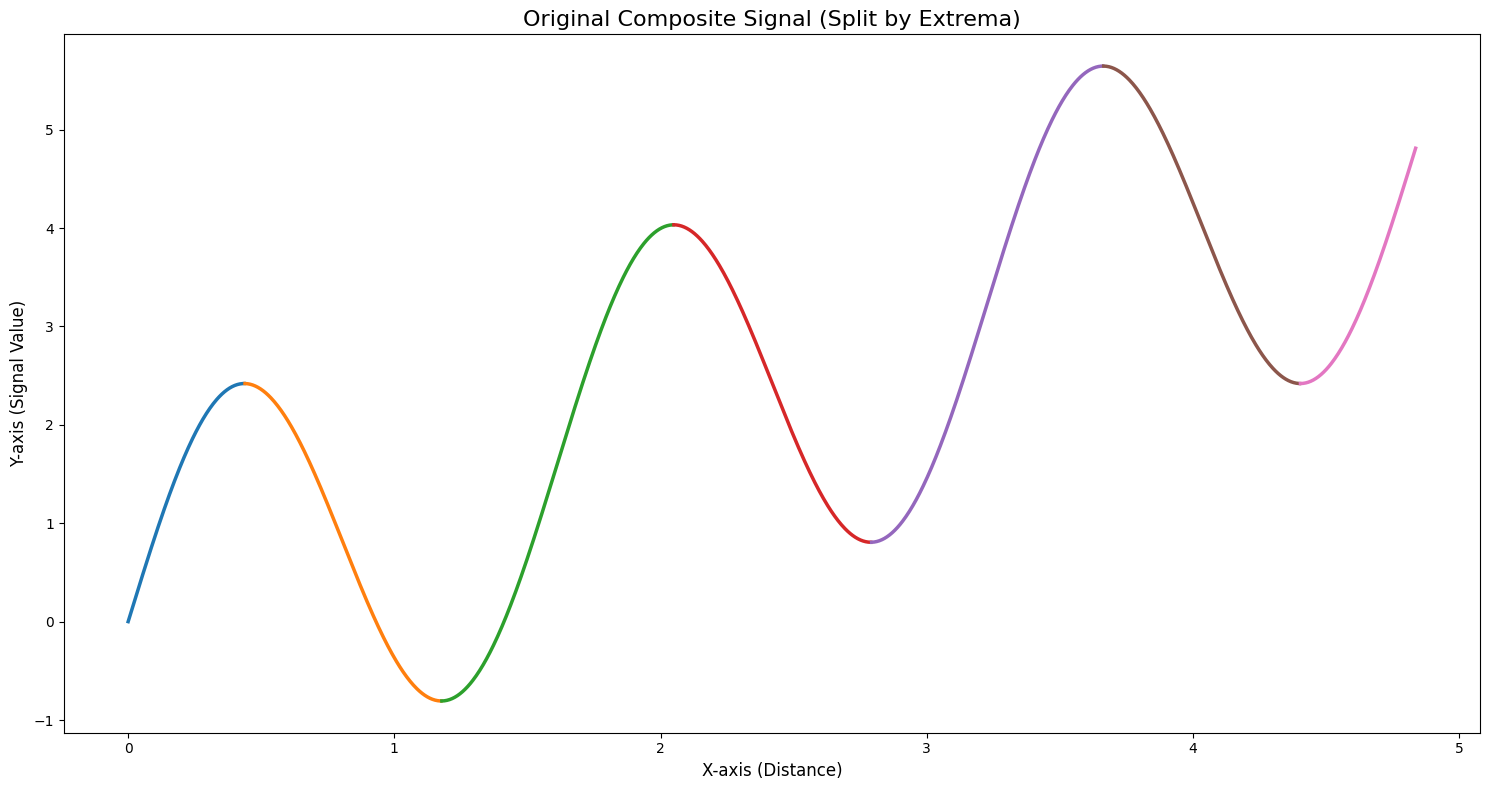


--- Performing Cyclical Segment Appending with new logic ---
Segments merged with different logic for up/down segments.

--- Merged Array 1 ---
  Created by appending original segments: [1]
  Total length: 136 points.

--- Merged Array 2 ---
  Created by appending original segments: [3]
  Total length: 270 points.

--- Merged Array 3 ---
  Created by appending original segments: [5]
  Total length: 270 points.

--- Merged Array 4 ---
  Created by appending original segments: [7]
  Total length: 135 points.

--- Merged Array 5 ---
  Created by appending original segments: []
  Total length: 229 points.

--- Merged Array 6 ---
  Created by appending original segments: []
  Total length: 230 points.

--- Merged Array 7 ---
  Created by appending original segments: []
  Total length: 229 points.



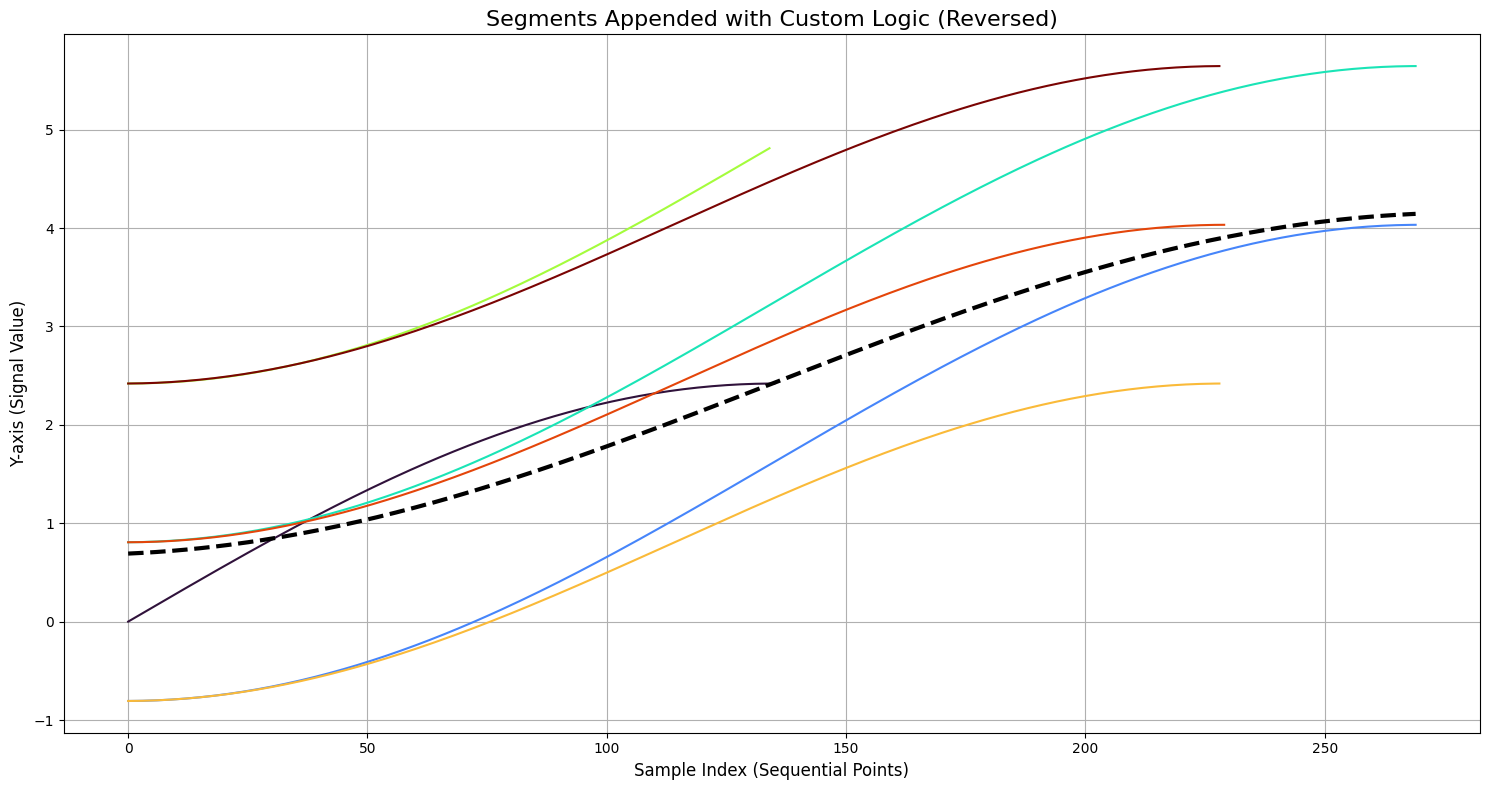

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def generate_and_process_signal():
    """
    Generates a composite signal, splits it at its true turning points,
    plots the original result, and then creates a second plot with
    segments appended based on a cycle-skip value N.
    """
    # --- 1. Signal Parameters ---
    amplitude = 1.225932543674509211939494
    frequency = 1.235590e+03
    wave_speed = 1.0
    num_cycles = 3030
    slope_degrees =45.0

    amplitude = 2
    frequency = 0.619885 * 1
    wave_speed = 1
    num_cycles = 3
    slope_degrees = 45.0


    # --- 2. Calculate Spatial & Signal Properties ---
    if frequency <= 0:
        raise ValueError("Frequency must be a positive number.")
    wavelength = wave_speed / frequency
    k = 2 * np.pi / wavelength
    slope_gradient = np.tan(np.deg2rad(slope_degrees))

    print(f"--- Wave Properties ---")
    print(f"Calculated Wavelength: {wavelength:.4f}")
    print(f"Wave Number (k): {k:.4f}")
    print(f"Slope (m): {slope_gradient:.4f}\n")

    # --- 3. Generate the Signal Data ---
    x_max = num_cycles * wavelength
    num_points = int(num_cycles * 500)
    x_values = np.linspace(0, x_max, num_points)
    y_sine = amplitude * np.sin(k * x_values)
    y_linear = slope_gradient * x_values
    y_values = y_sine + y_linear

    # --- 4. Split Signal using Calculus (Derivative Method) ---
    cos_val = -slope_gradient / (amplitude * k)

    split_y_arrays = []
    split_x_locations = []

    if abs(cos_val) > 1:
        print("No turning points exist. The linear slope is too steep.")
        split_y_arrays = [y_values]
    else:
        principal_angle = np.arccos(cos_val)
        n = 0
        while True:
            x_loc1 = (2 * n * np.pi + principal_angle) / k
            x_loc2 = (2 * (n + 1) * np.pi - principal_angle) / k
            stop_adding = True
            if x_loc1 < x_max:
                split_x_locations.append(x_loc1)
                stop_adding = False
            if x_loc2 < x_max:
                split_x_locations.append(x_loc2)
                stop_adding = False
            if stop_adding: break
            n += 1
        
        split_x_locations.sort()
        split_indices_raw = np.searchsorted(x_values, split_x_locations)
        split_indices = np.concatenate(([0], split_indices_raw, [len(x_values) - 1]))

        for i in range(len(split_indices) - 1):
            start_index = split_indices[i]
            end_index = split_indices[i+1]
            split_y_arrays.append(y_values[start_index:end_index])
    
    print(f"--- Splitting Signal by Derivative ---")
    print(f"cos(kx) solved for: {cos_val:.4f}")
    print(f"Calculated {len(split_x_locations)} split points (extrema).")
    print(f"Splitting into {len(split_y_arrays)} segments.\n")

    # --- 5. Plot the Original Results (UNCHANGED) ---
    fig1, ax1 = plt.subplots(figsize=(15, 8))
    split_x_arrays_for_plot = []
    for i in range(len(split_indices) - 1):
        start_index = split_indices[i]
        end_index = split_indices[i+1]
        split_x_arrays_for_plot.append(x_values[start_index:end_index])

    for i in range(len(split_x_arrays_for_plot)):
        ax1.plot(split_x_arrays_for_plot[i], split_y_arrays[i],
                 label=f'Segment {i+1}', linewidth=2.5)
    # ax1.vlines(split_x_locations, ymin=y_values.min(), ymax=y_values.max(),
            #    colors='red', linestyles=':', label='True Extrema (y\'=0)')
    ax1.set_title(f'Original Composite Signal (Split by Extrema)', fontsize=16)
    ax1.set_xlabel('X-axis (Distance)', fontsize=12)
    ax1.set_ylabel('Y-axis (Signal Value)', fontsize=12)
    # ax1.legend(title='Signal Segments')
    fig1.tight_layout()
    plt.show()

    # --- 6. NEW: Appending Segments Based on Cycle Skip N ---
    print("\n--- Performing Cyclical Segment Appending with new logic ---")
    N_cycles_skip_up = 3030
    N_cycles_skip_down = 3030- 1
    
    num_up_groups = N_cycles_skip_up
    num_down_groups = N_cycles_skip_down
    total_groups = num_up_groups + num_down_groups
    
    grouped_y_segments = [[] for _ in range(total_groups)]
    grouped_indices = [[] for _ in range(total_groups)]

    for i, y_seg in enumerate(split_y_arrays):
        if (i + 1) % 2 != 0: 
            up_segment_index = i // 2
            group_index = up_segment_index % num_up_groups
            segment_to_add = y_seg
        else: 
            down_segment_index = (i - 1) // 2
            group_index = (down_segment_index % num_down_groups) + num_up_groups
            segment_to_add = y_seg[::-1]
            
        grouped_y_segments[group_index].append(segment_to_add)
        grouped_indices[group_index].append(i + 1)

    final_merged_y_arrays = []
    for group in grouped_y_segments:
        if group:
            final_merged_y_arrays.append(np.concatenate(group))

    print(f"Segments merged with different logic for up/down segments.\n")

    # --- 7. NEW: Print and Plot the Merged Data ---
    fig2, ax2 = plt.subplots(figsize=(15, 8))
    colors = plt.cm.turbo(np.linspace(0, 1, len(final_merged_y_arrays)))

    for i, merged_y in enumerate(final_merged_y_arrays):
        x_merged = np.arange(len(merged_y))
        original_segs = grouped_indices[i]
        
        print(f"--- Merged Array {i+1} ---")
        print(f"  Created by appending original segments: {original_segs}")
        print(f"  Total length: {len(merged_y)} points.\n")
        
        legend_label = f'Segs: {original_segs}'
        ax2.plot(x_merged, merged_y, color=colors[i], label=legend_label)
        
    # --- ADDITION: Calculate and plot the overall average ---
    # To average arrays of different lengths, we must first interpolate them
    # to a common length (the length of the longest array).
    if final_merged_y_arrays:
        max_len = max(len(arr) for arr in final_merged_y_arrays)
        
        interpolated_arrays = []
        for merged_y in final_merged_y_arrays:
            original_x = np.linspace(0, 1, len(merged_y))
            new_x = np.linspace(0, 1, max_len)
            interpolated_y = np.interp(new_x, original_x, merged_y)
            interpolated_arrays.append(interpolated_y)
            
        # Calculate the element-wise average of all interpolated arrays
        average_y = np.mean(interpolated_arrays, axis=0)
        average_x = np.arange(len(average_y))
        
        # Plot the average line
        ax2.plot(average_x, average_y, color='black', linestyle='--', linewidth=3, label='Overall Average', zorder=10)
    
    ax2.set_title(f'Segments Appended with Custom Logic (Reversed)', fontsize=16)
    ax2.set_xlabel('Sample Index (Sequential Points)', fontsize=12)
    ax2.set_ylabel('Y-axis (Signal Value)', fontsize=12)
    # ax2.legend(title="Merged Groups", fontsize='small')
    ax2.grid(True)
    fig2.tight_layout()
    plt.show()


if __name__ == '__main__':
    generate_and_process_signal()


[0.         0.03144608 0.06288438 0.09430714 0.12570658 0.15707494
 0.18840447 0.21968742 0.25091606 0.28208266 0.31317953 0.34419897
 0.37513331 0.4059749  0.43671613 0.46734939 0.49786711 0.52826174
 0.55852577 0.58865171 0.61863212 0.64845959 0.67812674 0.70762624
 0.73695079 0.76609315 0.7950461  0.8238025  0.85235522 0.88069723
 0.90882149 0.93672107 0.96438907 0.99181864 1.019003   1.04593544
 1.07260929 1.09901796 1.12515492 1.15101371 1.17658793 1.20187127
 1.22685747 1.25154035 1.27591382 1.29997185 1.32370848 1.34711785
 1.37019418 1.39293176]
[12.56637061 12.56481723 12.56015745 12.55239243 12.5415241  12.52755514
 12.51048899 12.49032989 12.46708281 12.44075351 12.41134849 12.37887502
 12.34334113 12.3047556  12.26312798 12.21846856 12.17078837 12.12009921
 12.06641361 12.00974483 11.9501069  11.88751455 11.82198325 11.75352922
 11.68216938 11.60792135 11.53080352 11.45083492 11.36803535 11.28242527
 11.19402584 11.10285892 11.00894705 10.91231345 10.812982   10.71097727
 1

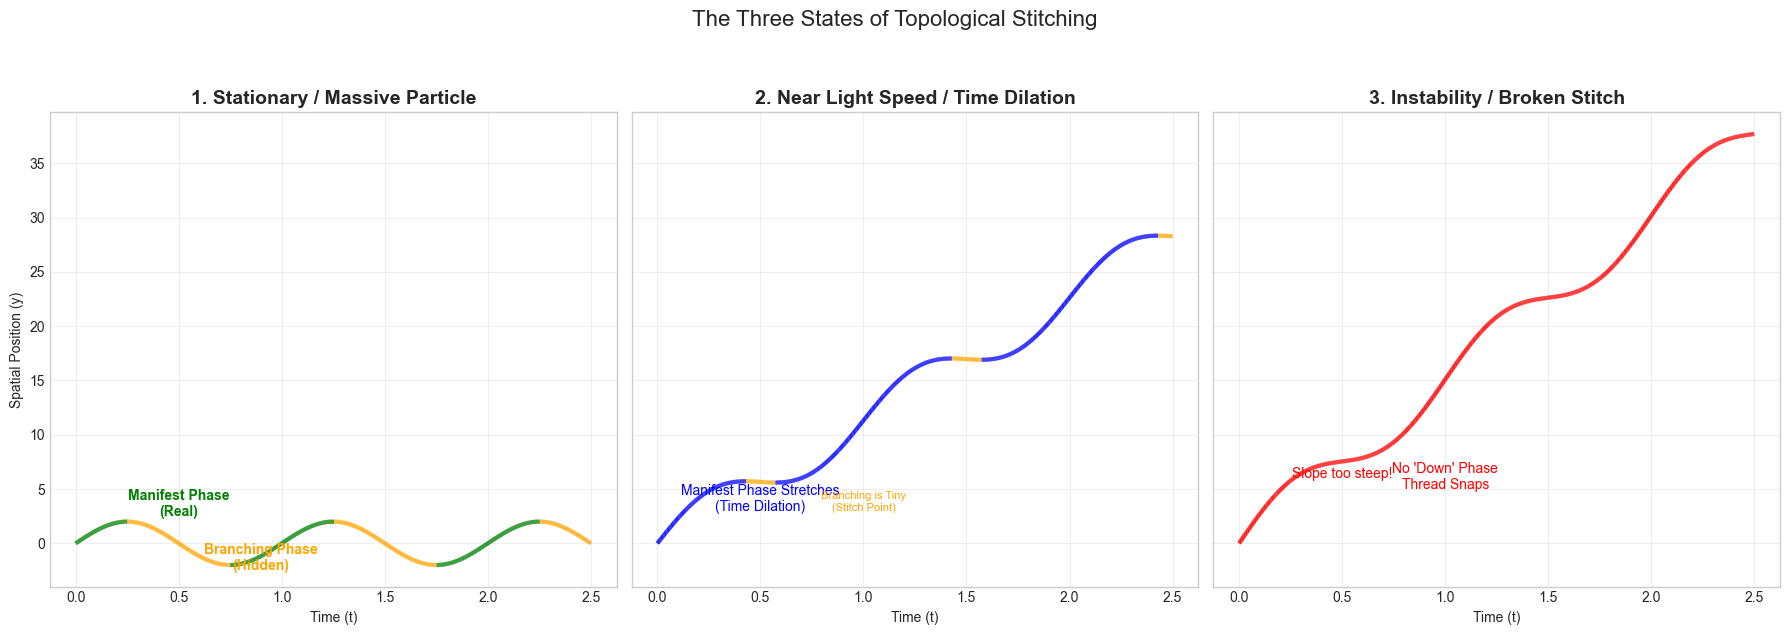

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def visualize_stitch_scenarios():
    """
    Visualizes the three states of the Topological Stitch:
    1. Stationary (Rest): Balanced Up/Down phases.
    2. Light Speed (Limit): The 'Down' phase vanishes.
    3. Instability (Broken): Slope exceeds amplitude, no stitch possible.
    """
    # Constants
    A = 2.0  # Amplitude
    k = 2 * np.pi # One cycle per unit
    t = np.linspace(0, 2.5, 1000) # Show 2.5 cycles
    
    # We will vary the Slope 'm' to create the scenarios
    # Derivative y' = Ak cos(kt) + m
    # Max downward slope of sine is -Ak.
    # Stitch breaks if m > Ak.
    
    max_sine_slope = A * k
    
    scenarios = [
        {"name": "1. Stationary / Massive Particle", "m": 0.0, "color": "green"},
        {"name": "2. Near Light Speed / Time Dilation", "m": 0.9 * max_sine_slope, "color": "blue"},
        {"name": "3. Instability / Broken Stitch", "m": 1.2 * max_sine_slope, "color": "red"}
    ]
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    for i, scen in enumerate(scenarios):
        ax = axes[i]
        m = scen["m"]
        
        # Calculate Wave
        y = A * np.sin(k * t) + m * t
        print(y[:50])
        
        # Calculate Derivative for Coloring
        y_prime = A * k * np.cos(k * t) + m
        print(y_prime[:50])
        
        # Color Logic:
        # Positive Slope (Real) = Solid Color
        # Negative Slope (Branching) = Red/Dashed or Distinct
        
        # Create segments for LineCollection
        points = np.array([t, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Determine colors based on derivative sign
        # 1 = Real (Up), -1 = Branching (Down)
        signs = np.sign(y_prime[:-1])
        # print(signs)
        
        # Custom color map for this segment
        # We'll construct a list of colors manually for clarity
        colors = []
        for s in signs:
            if s >= 0:
                colors.append(scen["color"]) # Real Phase
            else:
                colors.append('orange') # Branching Phase (Standard for all)
                
        lc = LineCollection(segments, colors=colors, linewidths=3)
        ax.add_collection(lc)
        # ax.plot(y,t)
        # Plot styling
        ax.set_title(scen["name"], fontsize=14, fontweight='bold')
        ax.set_xlabel("Time (t)")
        if i == 0: ax.set_ylabel("Spatial Position (y)")
        ax.grid(True, alpha=0.3)
        ax.autoscale()
        
        # Annotations
        if i == 0:
            ax.text(0.5, A+0.5, "Manifest Phase\n(Real)", color='green', ha='center', fontweight='bold')
            ax.text(0.9, -A-0.5, "Branching Phase\n(Hidden)", color='orange', ha='center', fontweight='bold')
        elif i == 1:
             ax.text(0.5, 3, "Manifest Phase Stretches\n(Time Dilation)", color='blue', ha='center')
             ax.text(1.0, 3, "Branching is Tiny\n(Stitch Point)", color='orange', ha='center', fontsize=8)
        elif i == 2:
             ax.text(0.5, 6, "Slope too steep!", color='red', ha='center')
             ax.text(1.0, 5, "No 'Down' Phase\nThread Snaps", color='red', ha='center')

    plt.suptitle("The Three States of Topological Stitching", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.savefig('stitch_scenarios_viz.png')

if __name__ == "__main__":
    visualize_stitch_scenarios()

--- Causal Stitching Laboratory Initialized ---

Running: Relativity Calibration Check...
--- RESULTS ---
Convergence Factor at v->c: 3.14159
Target (PI): 3.14159
Match: True


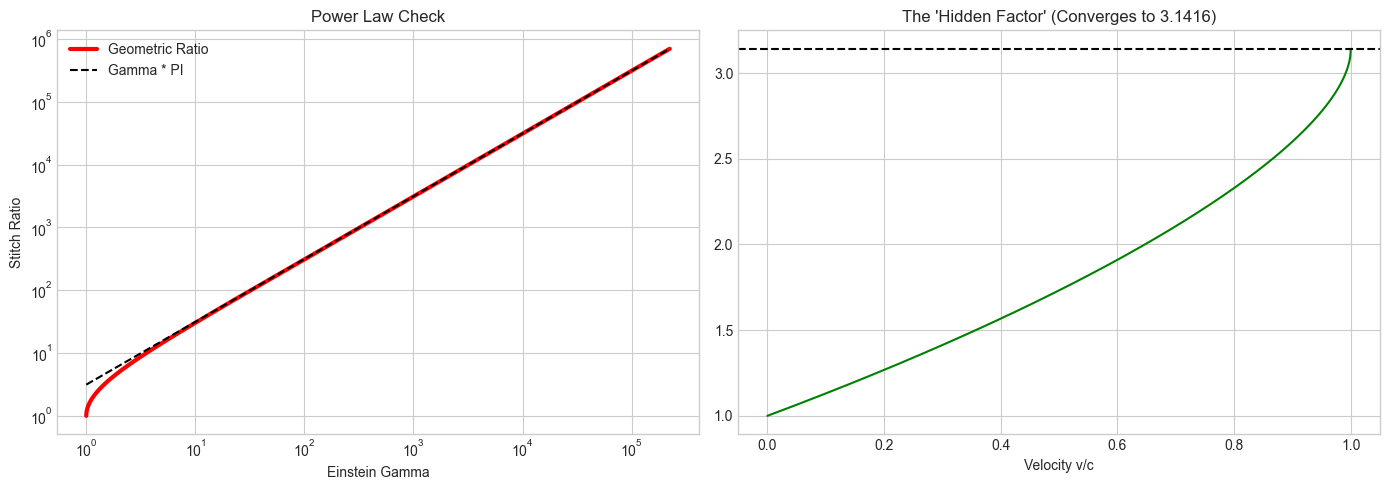

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

class CausalStitchingLab:
    """
    The Causal Stitching Laboratory
    -------------------------------
    A suite of simulations to validate the Causal Bundle & Topological Time-Stitching Theory.
    
    Modules:
    1. visualize_topology: Shows the Phase Space loop and the 'Stitch'.
    2. simulate_bundle: Shows the 'Fiber Optic' nature of particles and Pruning.
    3. scan_resonance: Maps the Frequency/Slope quantization bands.
    4. check_relativity: Verifies the Pi-Convergence with Time Dilation.
    5. show_scenarios: Visualizes Rest vs Light Speed vs Instability.
    """

    def __init__(self):
        # Global Constants for the Universe Model
        self.C = 1.0  # Speed of Light
        self.RESONANCE_FREQ = 0.619885
        print("--- Causal Stitching Laboratory Initialized ---")

    def visualize_topology(self):
        """
        Visualizes the 'Stitching' mechanism in Phase Space.
        Demonstrates how a linear path creates a closed loop in the processor.
        """
        print("\nRunning: Topological Phase Space Visualization...")
        AMPLITUDE = 2.0
        FREQUENCY = self.RESONANCE_FREQ
        WAVE_SPEED = 1.0
        NUM_CYCLES = 6
        SLOPE_DEGREES = 45.0

        wavelength = WAVE_SPEED / FREQUENCY
        k = 2 * np.pi / wavelength
        slope_m = np.tan(np.deg2rad(SLOPE_DEGREES))
        x_max = NUM_CYCLES * wavelength
        t = np.linspace(0, x_max, 5000)
        
        # Master Equation: y = A*sin(kt) + mt
        y = AMPLITUDE * np.sin(k * t) + slope_m * t
        y_prime = AMPLITUDE * k * np.cos(k * t) + slope_m

        fig = plt.figure(figsize=(14, 10))
        
        # Plot 1: The Linear Wave
        ax1 = fig.add_subplot(2, 2, 1)
        points = np.array([t, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        norm = plt.Normalize(-1, 1)
        lc = LineCollection(segments, cmap='coolwarm_r', norm=norm)
        lc.set_array(np.sign(y_prime[:-1]))
        lc.set_linewidth(2)
        ax1.add_collection(lc)
        ax1.autoscale_view()
        ax1.set_title(f"The Causal Wave (f={FREQUENCY})")
        ax1.set_xlabel("Time"); ax1.set_ylabel("State")

        # Plot 2: Phase Space (Detrended)
        ax2 = fig.add_subplot(2, 2, 2)
        detrended_y = AMPLITUDE * np.sin(k * t)
        ax2.plot(detrended_y, y_prime, color='purple')
        ax2.axhline(0, color='red', linestyle='--', label="Event Horizon")
        ax2.set_title("Phase Space: The Closed Loop Engine")
        ax2.set_xlabel("Position (Detrended)"); ax2.set_ylabel("Processing Speed (y')")
        ax2.legend()

        plt.tight_layout()
        plt.show()

    def simulate_bundle(self):
        """
        Visualizes the 'Bundle of Threads' and Probabilistic Pruning.
        Shows how 'Delay Choice' and 'Entanglement' work via filtering.
        """
        print("\nRunning: Bundle Interaction Simulation...")
        NUM_THREADS = 100
        NUM_STEPS = 500
        AMPLITUDE = 1.5
        k = 2 * np.pi * self.RESONANCE_FREQ
        t = np.linspace(0, 12, NUM_STEPS)
        
        # Generate threads with slight dispersion
        thread_offsets = np.random.normal(0, 0.4, NUM_THREADS)
        all_paths = np.zeros((NUM_THREADS, NUM_STEPS))
        for i in range(NUM_THREADS):
            all_paths[i, :] = AMPLITUDE * np.sin(k * t) + t + thread_offsets[i]

        # Interaction Event
        INTERACTION_IDX = 250
        TARGET_POS = all_paths[0, INTERACTION_IDX] # Center
        WIDTH = 0.5
        
        weights = np.ones(NUM_THREADS)
        
        # Calculate survival weight based on proximity to interaction
        for i in range(NUM_THREADS):
            dist = abs(all_paths[i, INTERACTION_IDX] - TARGET_POS)
            weights[i] = np.exp(- (dist**2) / (2 * WIDTH**2))

        fig, ax = plt.subplots(figsize=(14, 6))
        ax.set_facecolor('#1e1e1e')
        
        for i in range(NUM_THREADS):
            # Plot Past (Full Brightness)
            ax.plot(t[:INTERACTION_IDX], all_paths[i, :INTERACTION_IDX], 
                    color='cyan', alpha=0.1, lw=1)
            # Plot Future (Pruned Brightness)
            if weights[i] > 0.01:
                ax.plot(t[INTERACTION_IDX:], all_paths[i, INTERACTION_IDX:], 
                        color='cyan', alpha=0.1 * weights[i], lw=1)
                
        ax.scatter(t[INTERACTION_IDX], TARGET_POS, s=200, color='white', edgecolors='red', zorder=10)
        ax.set_title("The Bundle: Pruning of Invalid Threads")
        plt.show()

    def check_relativity(self):
        """
        The Pi-Convergence Test.
        Checks if the Geometric Stitch Ratio scales with Einstein's Gamma.
        """
        print("\nRunning: Relativity Calibration Check...")
        velocities = np.linspace(0.0, 0.99999999999 * self.C, 1000)
        gammas = []
        ratios = []

        for v in velocities:
            # Einstein
            gamma = 1 / np.sqrt(1 - (v**2 / self.C**2))
            gammas.append(gamma)
            
            # Geometric Stitch
            # Logic: cos(theta) = -v/c
            val = -v / self.C
            theta = np.arccos(val)
            real_angle = 2 * theta
            branching_angle = 2 * (np.pi - theta)
            ratio = real_angle / branching_angle
            ratios.append(ratio)

        gammas = np.array(gammas)
        ratios = np.array(ratios)
        scaling_factor = ratios / gammas
        final_factor = scaling_factor[-1]

        print(f"--- RESULTS ---")
        print(f"Convergence Factor at v->c: {final_factor:.5f}")
        print(f"Target (PI): {np.pi:.5f}")
        print(f"Match: {abs(final_factor - np.pi) < 0.001}")

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        ax1.loglog(gammas, ratios, 'r-', lw=3, label='Geometric Ratio')
        ax1.loglog(gammas, gammas * np.pi, 'k--', label='Gamma * PI')
        ax1.set_title("Power Law Check")
        ax1.set_xlabel("Einstein Gamma"); ax1.set_ylabel("Stitch Ratio")
        ax1.legend()
        
        ax2.plot(velocities, scaling_factor, 'g-')
        ax2.axhline(np.pi, color='k', ls='--')
        ax2.set_title(f"The 'Hidden Factor' (Converges to {final_factor:.4f})")
        ax2.set_xlabel("Velocity v/c")
        
        plt.tight_layout()
        plt.show()

    def show_scenarios(self):
        """
        Visualizes the 3 states: Rest, Light Speed, Instability.
        """
        print("\nRunning: Scenario Visualization...")
        A = 1.0; k = 2 * np.pi
        t = np.linspace(0, 2.5, 1000)
        max_slope = A * k
        
        scenarios = [
            {"name": "Rest (Mass)", "m": 0.0},
            {"name": "Light Speed (Time Dilation)", "m": 0.95 * max_slope},
            {"name": "Instability (Broken Stitch)", "m": 1.2 * max_slope}
        ]
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
        for i, scen in enumerate(scenarios):
            m = scen["m"]
            y = A * np.sin(k * t) + m * t
            y_prime = A * k * np.cos(k * t) + m
            
            # Color segments
            points = np.array([t, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            colors = ['blue' if yp >= 0 else 'orange' for yp in y_prime[:-1]]
            
            lc = LineCollection(segments, colors=colors, lw=2)
            axes[i].add_collection(lc)
            axes[i].set_title(scen["name"])
            axes[i].grid(True, alpha=0.3)
            axes[i].autoscale()
            
        plt.suptitle("Blue = Manifest Phase | Orange = Branching Phase")
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    lab = CausalStitchingLab()
    
    # Uncomment the simulation you want to run:
    # lab.visualize_topology()
    # lab.simulate_bundle()
    lab.check_relativity()
    # lab.show_scenarios()


Running: Gravity Phase Space Topology...


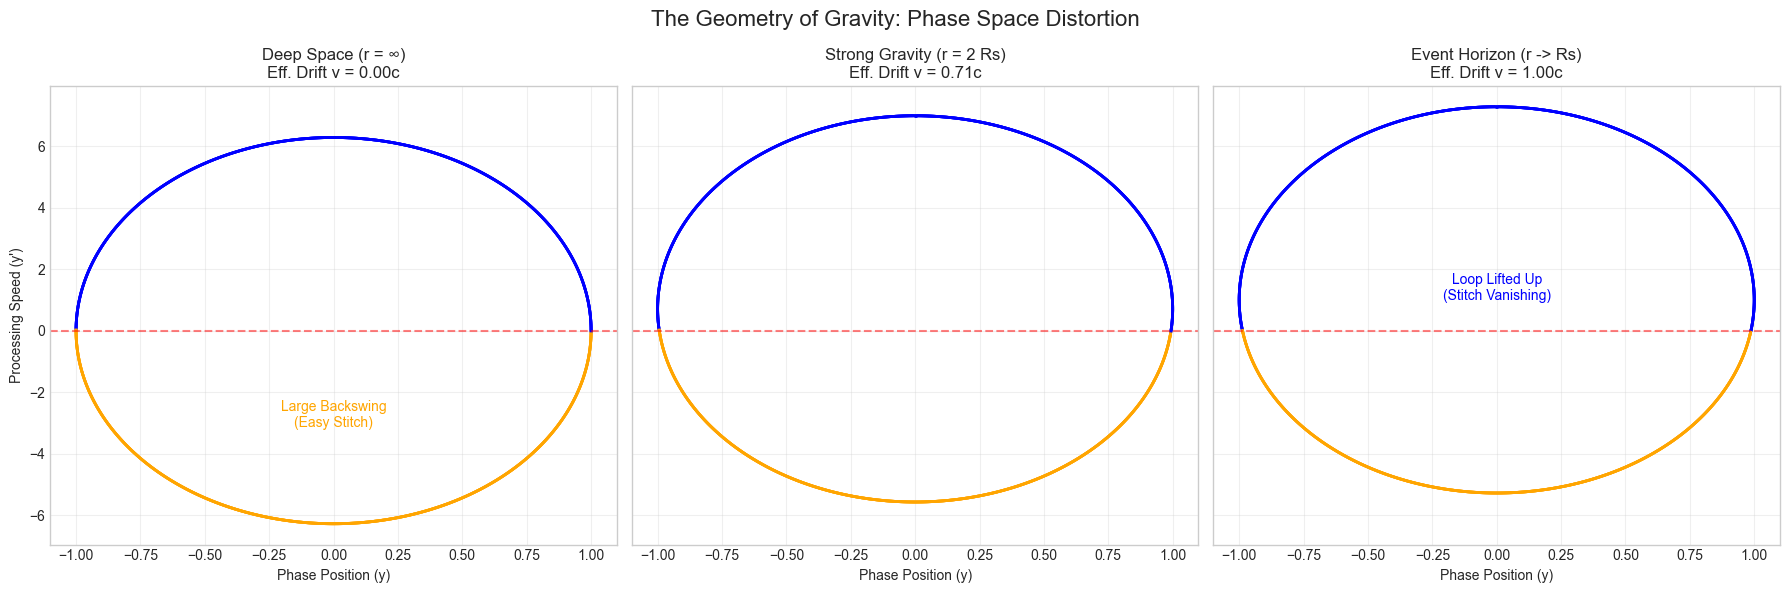


Running: Gravity Wave Scenarios...


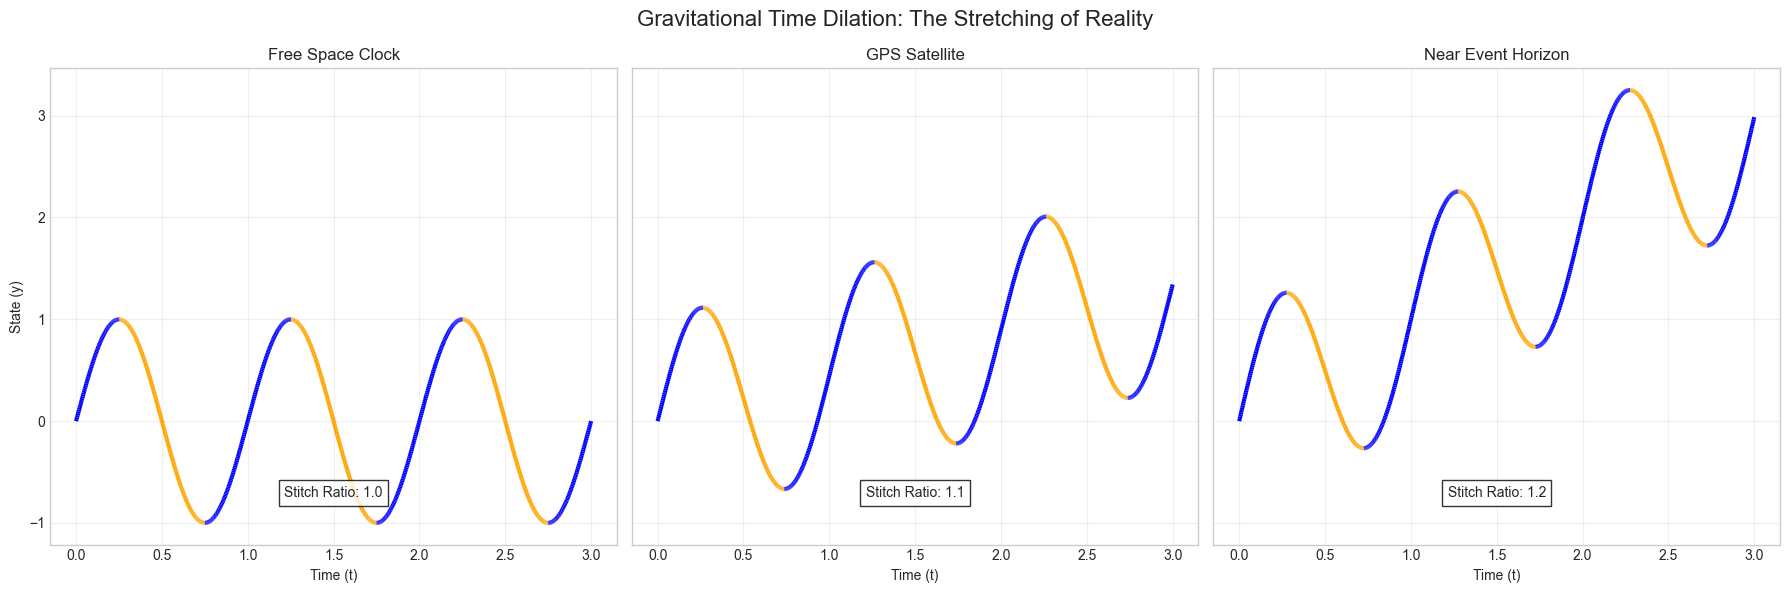

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

class GravityTopologyLab:
    """
    Visualizes the mechanical effect of Gravity on the Causal Stitch.
    Based on the Equivalence Principle:
    A stationary clock at radius r experiences an 'Effective Drift' (m)
    equal to the Escape Velocity at that height.
    """
    
    def __init__(self):
        self.C = 1.0
        self.Rs = 1.0 # Schwarzschild Radius
        self.A_base = 1.0 # Base Amplitude in free space
        self.k = 2 * np.pi # Base Frequency
    
    def visualize_gravity_topology(self):
        """
        Shows the Phase Space Loop (The 'Engine') at different depths in the gravity well.
        As we go deeper, the loop gets distorted, making the 'Stitch' harder to close.
        """
        print("\nRunning: Gravity Phase Space Topology...")
        
        # Define 3 locations
        locations = [
            {"name": "Deep Space (r = ∞)", "r": 1000.0},
            {"name": "Strong Gravity (r = 2 Rs)", "r": 2.0},
            {"name": "Event Horizon (r -> Rs)", "r": 1.001}
        ]
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
        
        t = np.linspace(0, 4, 2000)
        
        for i, loc in enumerate(locations):
            r = loc["r"] * self.Rs
            
            # Calculate Effective Drift (Escape Velocity)
            # This is the "Wind" of gravity blowing on the stitch
            if loc["r"] > 500:
                v_esc = 0
            else:
                v_esc = self.C * np.sqrt(self.Rs / r)
            
            # The Stitch Parameters
            # Amplitude A scales to keep Max Slope = C
            # In this visualization, we assume the internal engine runs at C.
            # So Amplitude is fixed, but the Drift m fights it.
            
            m = v_esc # The drift caused by gravity
            A = self.A_base
            
            # Master Equation
            y = A * np.sin(self.k * t) # Detrended position for Phase Space
            y_prime = A * self.k * np.cos(self.k * t) + m # Velocity includes drift
            
            # Plot Phase Space (y vs y')
            # Color logic: Red = Branching (Backswing), Blue = Real
            
            points = np.array([y, y_prime]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            
            # Color by derivative sign relative to 0
            # Note: y_prime here is the TOTAL velocity. 
            # The Stitch happens when TOTAL velocity < 0.
            
            colors = ['orange' if yp < 0 else 'blue' for yp in y_prime[:-1]]
            
            lc = LineCollection(segments, colors=colors, linewidths=2)
            axes[i].add_collection(lc)
            
            # The Event Horizon Line (y' = 0)
            axes[i].axhline(0, color='red', linestyle='--', alpha=0.5, label='Stitch Horizon')
            
            axes[i].set_title(f"{loc['name']}\nEff. Drift v = {v_esc:.2f}c")
            axes[i].set_xlabel("Phase Position (y)")
            if i == 0: axes[i].set_ylabel("Processing Speed (y')")
            axes[i].grid(True, alpha=0.3)
            axes[i].autoscale()
            
            # Annotations
            if i == 0:
                axes[i].text(0, -A*self.k/2, "Large Backswing\n(Easy Stitch)", ha='center', color='orange')
            if i == 2:
                axes[i].text(0, 1, "Loop Lifted Up\n(Stitch Vanishing)", ha='center', color='blue')

        plt.suptitle("The Geometry of Gravity: Phase Space Distortion", fontsize=16)
        plt.tight_layout()
        plt.show()

    def show_gravity_scenarios(self):
        """
        Shows the Wave History (Time vs State) for a stationary clock 
        at different gravitational depths.
        This visualizes WHY time slows down: The 'Real' phase stretches out.
        """
        print("\nRunning: Gravity Wave Scenarios...")
        
        locations = [
            {"name": "Free Space Clock", "r": 1000.0},
            {"name": "GPS Satellite", "r": 5.0},
            {"name": "Near Event Horizon", "r": 1.01}
        ]
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
        t = np.linspace(0, 3, 1000)
        
        for i, loc in enumerate(locations):
            r = loc["r"] * self.Rs
            
            # Effective Drift
            if loc["r"] > 500: v_esc = 0
            else: v_esc = self.C * np.sqrt(self.Rs / r)
            
            m = v_esc
            A = self.A_base
            
            # Wave Equation: y = A sin(kt) + mt
            y = A * np.sin(self.k * t) + m * t
            y_prime = A * self.k * np.cos(self.k * t) + m
            
            points = np.array([t, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            colors = ['orange' if yp < 0 else 'blue' for yp in y_prime[:-1]]
            
            lc = LineCollection(segments, colors=colors, linewidths=3)
            axes[i].add_collection(lc)
            
            axes[i].set_title(f"{loc['name']}")
            axes[i].set_xlabel("Time (t)")
            if i == 0: axes[i].set_ylabel("State (y)")
            axes[i].grid(True, alpha=0.3)
            axes[i].autoscale()
            
            # Calculate Duty Cycle for display
            # Ratio of Blue pixels to Orange pixels
            blue_count = np.sum(y_prime > 0)
            orange_count = np.sum(y_prime < 0)
            if orange_count > 0:
                ratio = blue_count / orange_count
                axes[i].text(0.5, 0.1, f"Stitch Ratio: {ratio:.1f}", transform=axes[i].transAxes, 
                             ha='center', bbox=dict(facecolor='white', alpha=0.8))
            else:
                axes[i].text(0.5, 0.1, f"Stitch Ratio: ∞ (Time Stop)", transform=axes[i].transAxes, 
                             ha='center', bbox=dict(facecolor='white', alpha=0.8))

        plt.suptitle("Gravitational Time Dilation: The Stretching of Reality", fontsize=16)
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    lab = GravityTopologyLab()
    lab.visualize_gravity_topology()
    lab.show_gravity_scenarios()


Running: Gravity Phase Space Topology (Strict Mode)...


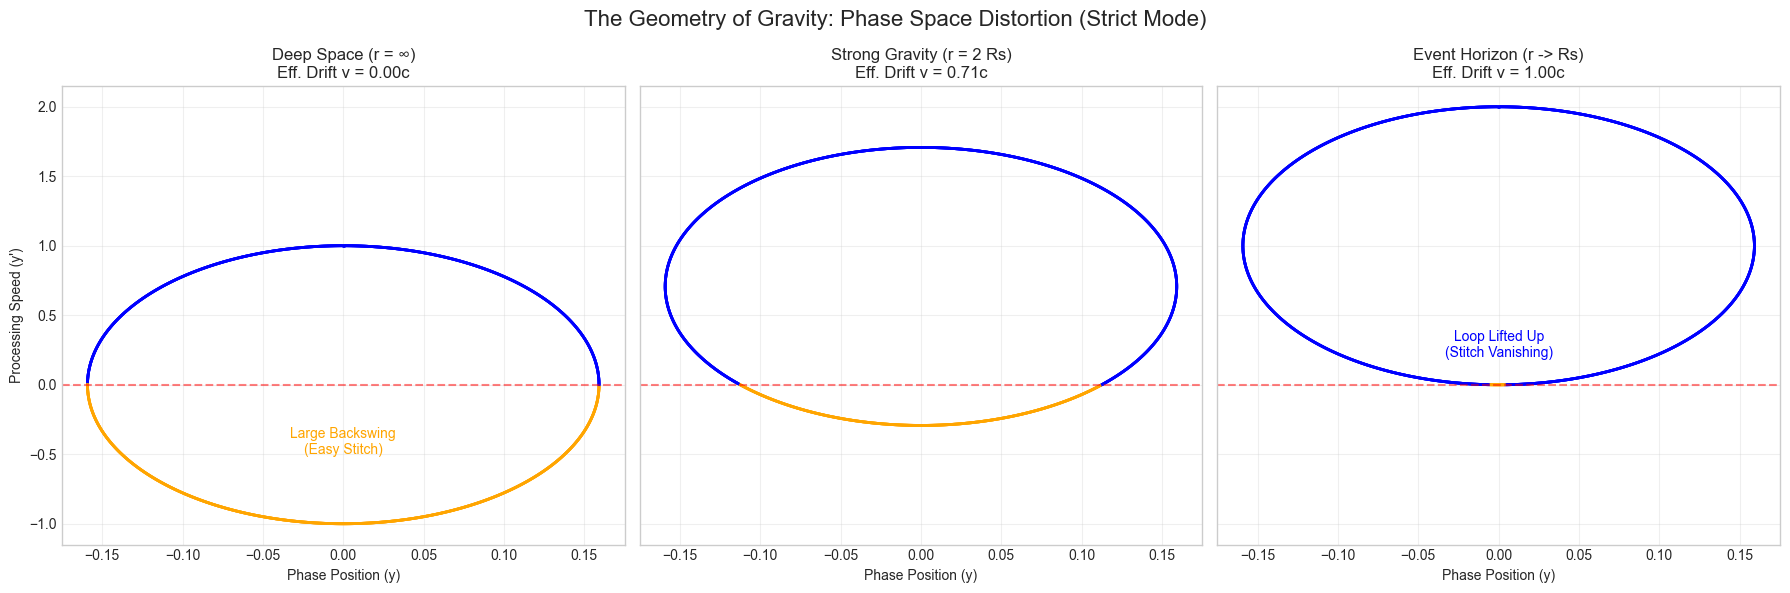


Running: Gravity Wave Scenarios (Strict Mode)...


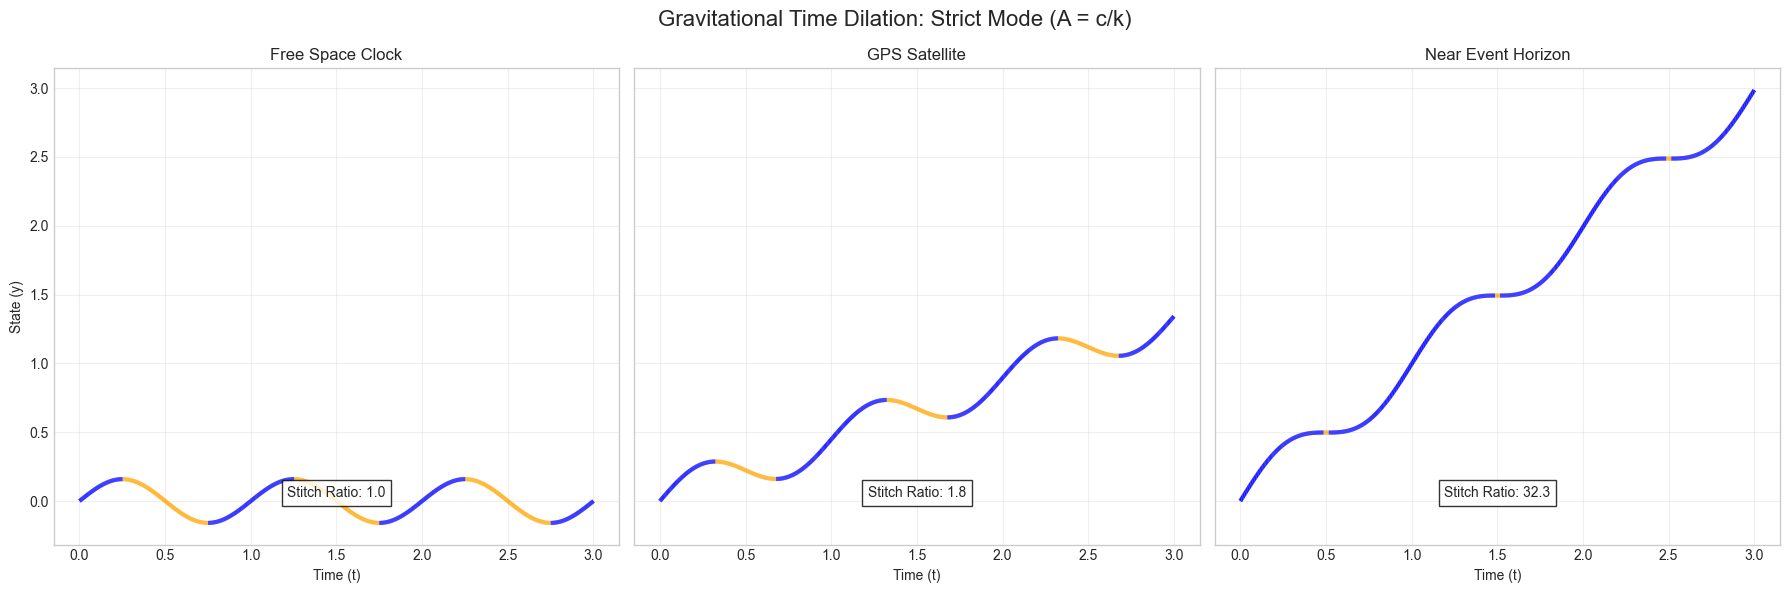

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

class GravityTopologyLab:
    """
    Visualizes the mechanical effect of Gravity on the Causal Stitch.
    Based on the Equivalence Principle:
    A stationary clock at radius r experiences an 'Effective Drift' (m)
    equal to the Escape Velocity at that height.
    """
    
    def __init__(self):
        self.C = 1.0
        self.Rs = 1.0 # Schwarzschild Radius
        self.A_base = 1.0 # Base Amplitude in free space
        self.k = 2 * np.pi # Base Frequency
    
    def visualize_gravity_topology(self):
        """
        Shows the Phase Space Loop (The 'Engine') at different depths in the gravity well.
        As we go deeper, the loop gets distorted, making the 'Stitch' harder to close.
        """
        print("\nRunning: Gravity Phase Space Topology (Strict Mode)...")
        
        # Define 3 locations
        locations = [
            {"name": "Deep Space (r = ∞)", "r": 1000.0},
            {"name": "Strong Gravity (r = 2 Rs)", "r": 2.0},
            {"name": "Event Horizon (r -> Rs)", "r": 1.001}
        ]
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
        
        t = np.linspace(0, 4, 2000)
        
        for i, loc in enumerate(locations):
            r = loc["r"] * self.Rs
            
            # Calculate Effective Drift (Escape Velocity)
            # This is the "Wind" of gravity blowing on the stitch
            if loc["r"] > 500:
                v_esc = 0
            else:
                v_esc = self.C * np.sqrt(self.Rs / r)
            
            # The Stitch Parameters
            # Amplitude A scales to keep Max Slope = C
            # STRICT MODE: Enforce A = c/k so internal engine speed limit is C.
            # This makes the struggle against gravity critical.
            
            m = v_esc # The drift caused by gravity
            A = self.C / self.k # Strict Mode Enforced
            
            # Master Equation
            y = A * np.sin(self.k * t) # Detrended position for Phase Space
            y_prime = A * self.k * np.cos(self.k * t) + m # Velocity includes drift
            
            # Plot Phase Space (y vs y')
            # Color logic: Red = Branching (Backswing), Blue = Real
            
            points = np.array([y, y_prime]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            
            # Color by derivative sign relative to 0
            # Note: y_prime here is the TOTAL velocity. 
            # The Stitch happens when TOTAL velocity < 0.
            
            colors = ['orange' if yp < 0 else 'blue' for yp in y_prime[:-1]]
            
            lc = LineCollection(segments, colors=colors, linewidths=2)
            axes[i].add_collection(lc)
            
            # The Event Horizon Line (y' = 0)
            axes[i].axhline(0, color='red', linestyle='--', alpha=0.5, label='Stitch Horizon')
            
            axes[i].set_title(f"{loc['name']}\nEff. Drift v = {v_esc:.2f}c")
            axes[i].set_xlabel("Phase Position (y)")
            if i == 0: axes[i].set_ylabel("Processing Speed (y')")
            axes[i].grid(True, alpha=0.3)
            axes[i].autoscale()
            
            # Annotations
            if i == 0:
                axes[i].text(0, -A*self.k/2, "Large Backswing\n(Easy Stitch)", ha='center', color='orange')
            if i == 2:
                axes[i].text(0, A*self.k*0.2, "Loop Lifted Up\n(Stitch Vanishing)", ha='center', color='blue')

        plt.suptitle("The Geometry of Gravity: Phase Space Distortion (Strict Mode)", fontsize=16)
        plt.tight_layout()
        plt.show()

    def show_gravity_scenarios(self):
        """
        Shows the Wave History (Time vs State) for a stationary clock 
        at different gravitational depths.
        This visualizes WHY time slows down: The 'Real' phase stretches out.
        """
        print("\nRunning: Gravity Wave Scenarios (Strict Mode)...")
        
        locations = [
            {"name": "Free Space Clock", "r": 1000.0},
            {"name": "GPS Satellite", "r": 5.0},
            {"name": "Near Event Horizon", "r": 1.01}
        ]
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
        t = np.linspace(0, 3, 1000)
        
        for i, loc in enumerate(locations):
            r = loc["r"] * self.Rs
            
            # Effective Drift
            if loc["r"] > 500: v_esc = 0
            else: v_esc = self.C * np.sqrt(self.Rs / r)
            
            m = v_esc
            # Strict Mode Enforced: A = c/k
            A = self.C / self.k
            
            # Wave Equation: y = A sin(kt) + mt
            y = A * np.sin(self.k * t) + m * t
            y_prime = A * self.k * np.cos(self.k * t) + m
            
            points = np.array([t, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            colors = ['orange' if yp < 0 else 'blue' for yp in y_prime[:-1]]
            
            lc = LineCollection(segments, colors=colors, linewidths=3)
            axes[i].add_collection(lc)
            
            axes[i].set_title(f"{loc['name']}")
            axes[i].set_xlabel("Time (t)")
            if i == 0: axes[i].set_ylabel("State (y)")
            axes[i].grid(True, alpha=0.3)
            axes[i].autoscale()
            
            # Calculate Duty Cycle for display
            # Ratio of Blue pixels to Orange pixels
            blue_count = np.sum(y_prime > 0)
            orange_count = np.sum(y_prime < 0)
            if orange_count > 0:
                ratio = blue_count / orange_count
                axes[i].text(0.5, 0.1, f"Stitch Ratio: {ratio:.1f}", transform=axes[i].transAxes, 
                             ha='center', bbox=dict(facecolor='white', alpha=0.8))
            else:
                axes[i].text(0.5, 0.1, f"Stitch Ratio: ∞ (Time Stop)", transform=axes[i].transAxes, 
                             ha='center', bbox=dict(facecolor='white', alpha=0.8))

        plt.suptitle("Gravitational Time Dilation: Strict Mode (A = c/k)", fontsize=16)
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    lab = GravityTopologyLab()
    lab.visualize_gravity_topology()
    lab.show_gravity_scenarios()


Running: Gravity River Visualization...
Particle at r=4.0Rs
River Speed: -0.50c
Required Swim Speed (Drift m): 0.50c
Visualization saved to gravity_river_viz.png


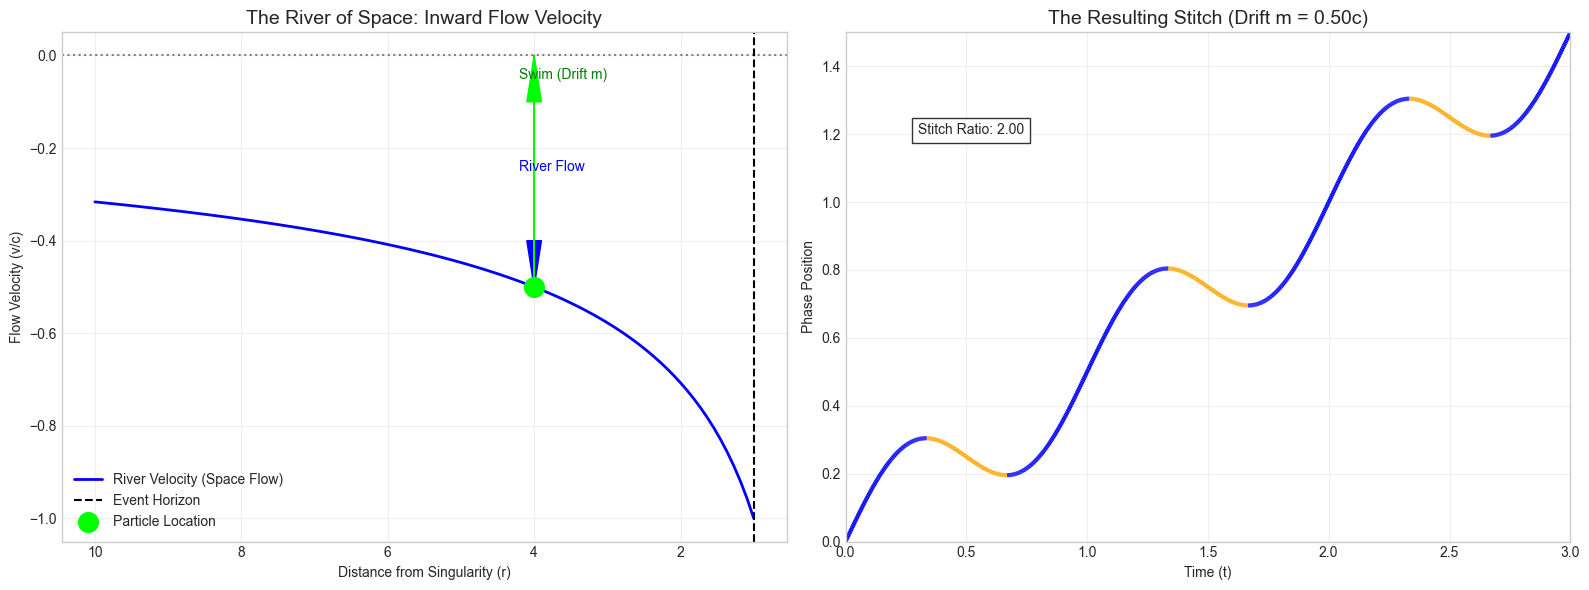

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

class GravityRiverModel:
    """
    Visualizes the 'River Model' of Gravity.
    
    Concept:
    1. Space is not static; it flows into mass (The River).
    2. A 'Stationary' particle is like a swimmer maintaining position against the current.
    3. The 'Drift' (m) in our Stitching Equation is simply the speed of the current.
    """
    
    def __init__(self):
        self.C = 1.0
        self.Rs = 1.0 # Schwarzschild Radius
        
    def visualize_river_mechanics(self):
        print("\nRunning: Gravity River Visualization...")
        
        # --- 1. Setup the River Field ---
        # Distance r from the Black Hole (at r=0)
        r = np.linspace(1.0, 10.0, 100) * self.Rs
        
        # Velocity of the River (Inward Flow)
        # v_flow = -c * sqrt(Rs/r) (Negative because it falls IN)
        v_flow = -self.C * np.sqrt(self.Rs / r)
        
        # --- 2. Setup the Swimmer (The Particle) ---
        # We place a particle at r = 4 Rs
        particle_r = 4.0 * self.Rs
        particle_v_flow = -self.C * np.sqrt(self.Rs / particle_r)
        
        # To stay stationary (dr/dt = 0), the particle must swim OUT at v_swim = -v_flow
        v_swim = -particle_v_flow
        
        print(f"Particle at r={particle_r:.1f}Rs")
        print(f"River Speed: {particle_v_flow:.2f}c")
        print(f"Required Swim Speed (Drift m): {v_swim:.2f}c")

        # --- 3. Visualization ---
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Plot 1: The Velocity Field (The River)
        ax1.plot(r, v_flow, 'b-', linewidth=2, label='River Velocity (Space Flow)')
        ax1.axhline(0, color='gray', linestyle=':')
        ax1.axvline(self.Rs, color='k', linestyle='--', label='Event Horizon')
        
        # Draw the Particle Swimmer
        ax1.scatter(particle_r, particle_v_flow, s=200, color='lime', zorder=10, label='Particle Location')
        
        # Draw vectors to show the struggle
        # River Vector (Downstream)
        ax1.arrow(particle_r, 0, 0, particle_v_flow, 
                  head_width=0.2, head_length=0.1, fc='blue', ec='blue', length_includes_head=True)
        ax1.text(particle_r + 0.2, particle_v_flow/2, "River Flow", color='blue')
        
        # Swim Vector (Upstream)
        ax1.arrow(particle_r, particle_v_flow, 0, -particle_v_flow, 
                  head_width=0.2, head_length=0.1, fc='lime', ec='lime', length_includes_head=True)
        ax1.text(particle_r + 0.2, particle_v_flow/2 + 0.2, "Swim (Drift m)", color='green')
        
        ax1.set_title("The River of Space: Inward Flow Velocity", fontsize=14)
        ax1.set_xlabel("Distance from Singularity (r)")
        ax1.set_ylabel("Flow Velocity (v/c)")
        ax1.invert_xaxis()
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: The Stitching Consequence (The Master Equation)
        # Show how this 'Swim' becomes the 'Drift' in phase space
        
        t = np.linspace(0, 3, 1000)
        k = 2 * np.pi
        A = self.C / k # Strict Mode
        m = v_swim # The swim speed IS the drift m
        
        # Wave function in the Swimmer's Frame
        # y = A sin(kt) + mt
        y = A * np.sin(k * t) + m * t
        
        # Calculate derivative to color the stitch
        y_prime = A * k * np.cos(k * t) + m
        
        points = np.array([t, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        colors = ['orange' if yp < 0 else 'blue' for yp in y_prime[:-1]]
        
        lc = LineCollection(segments, colors=colors, linewidths=3)
        ax2.add_collection(lc)
        ax2.set_xlim(0, 3)
        ax2.set_ylim(np.min(y), np.max(y))
        
        ax2.set_title(f"The Resulting Stitch (Drift m = {m:.2f}c)", fontsize=14)
        ax2.set_xlabel("Time (t)")
        ax2.set_ylabel("Phase Position")
        ax2.grid(True, alpha=0.3)
        
        # Annotations for ratio
        blue_len = np.sum(y_prime > 0)
        orange_len = np.sum(y_prime < 0)
        ratio = blue_len / orange_len
        ax2.text(0.1, 0.8, f"Stitch Ratio: {ratio:.2f}", transform=ax2.transAxes, 
                 bbox=dict(facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        plt.savefig('gravity_river_viz.png')
        print("Visualization saved to gravity_river_viz.png")

if __name__ == "__main__":
    river = GravityRiverModel()
    river.visualize_river_mechanics()

In [19]:
import numpy as np
from scipy.optimize import fsolve

def calculate_quantized_drifts():
    """
    Solves the 'Strict Mode' Resonance Equation.
    
    Constraint: A = c/omega (Strict Mode)
    Result: Omega cancels out. The equation constrains Drift 'm'.
    
    Equation: sqrt(1 - m^2) = m * (pi * N - arccos(-m))
    (assuming c=1)
    """
    
    def strict_resonance_eq(m, N):
        # LHS: Vertical drop of the wave
        lhs = np.sqrt(1 - m**2)
        
        # RHS: Vertical rise of the drift over N cycles
        # Phase duration = 2*pi*N - 2*arccos(-m)
        rhs = m * (np.pi * N - np.arccos(-m))
        
        return lhs - RHS
    
    print("--- Quantized Drift Velocities (Strict Mode) ---")
    print("N | Allowed Drift (v/c)")
    print("-" * 30)
    
    solutions = []
    
    for N in range(1, 11):
        # Define the error function for this N
        func = lambda m: np.sqrt(1 - m**2) - m * (np.pi * N - np.arccos(-m))
        
        # Initial guess: For large N, m is small. m ~ 1/N
        guess = 1.0 / (np.pi * N)
        
        # Solve
        m_sol = fsolve(func, guess)[0]
        solutions.append((N, m_sol))
        
        print(f"{N} | {m_sol:.8f}")

    return solutions

if __name__ == "__main__":
    calculate_quantized_drifts()

--- Quantized Drift Velocities (Strict Mode) ---
N | Allowed Drift (v/c)
------------------------------
1 | 1.00000000
2 | 0.21723363
3 | 0.12837455
4 | 0.09132520
5 | 0.07091346
6 | 0.05797180
7 | 0.04902962
8 | 0.04247962
9 | 0.03747452
10 | 0.03352514
